<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color:rgb(52, 152, 219); text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3)">Pr√©paration des donn√©es</h1>
<br/>
<br/>
  

<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 25px; color: #3498db">1- <u>reduction du nombre de variable de base_edu </u></h1>
    

In [ ]:
!pip install fastparquet
!pip install rpy2
!pip install pandas
!pip install matplotlib

In [3]:
#importation des packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [4]:
#chemin de la Base de donn√©es; 
#commentez l'url et vous remplacez par votre chemin sans supprimer!!!!!

url="C:/Users/lisaw/Desktop/ENSAE/2AD/Projet-stat-ap/Donnees/base_Edu.parquet"
base_Edu=pd.read_parquet(url)
base_Edu.head()

unique_learner_id  days_between_signup_and_first_activity  \
0   3838161406066513919                                      41   
1   5829430568065349352                                       0   
2   7677180318050051984                                     787   
3  -5150597998144597550                                     615   
4    969323468959211246                                     169   

   days_between_order_and_first_activity first_theory_activity_date  \
0                                      0 2017-12-17 15:00:23.000000   
1                                      0 2022-07-07 12:02:53.000000   
2                                    788 2022-05-10 01:35:49.000000   
3                                    616 2024-04-18 04:56:03.262330   
4                                    170 2019-03-19 12:32:56.000000   

   days_between_first_and_last_activities  chapter_before_success_count  \
0                                     265                             0   
1                                      27                             0   
2                                     295                             0   
3                                     138                             0   
4                                     554                             0   

   serie_before_success_count  quiz_before_success_count  \
0                           3                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   theory_activities_total  weekly_study_objective  ...  \
0                        3                    <NA>  ...   
1                       11                    <NA>  ...   
2                       73                     240  ...   
3                       75                    <NA>  ...   
4                       41                     120  ...   

   nb_weeks_weekly_study_objective_reached_80pct  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   nb_weeks_weekly_study_objective_reached_75pct  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   nb_weeks_weekly_study_objective_reached_70pct  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   nb_weeks_weekly_study_objective_not_reached  nb_weeks_no_activity  \
0                                            0                     0   
1                                            0                     0   
2                                            1                     0   
3                                            0                     0   
4                                            1                     0   

   nb_weeks_no_weekly_study_objective  pct_study_objective_reached  \
0                                   1                          0.0   
1                                   1                          0.0   
2                                   0                          0.0   
3                                   1                          0.0   
4                                   0                          0.0   

   pct_study_objective_not_reached  pct_study_objective_no_activity  \
0                              0.0                              0.0   
1                              0.0                              0.0   
2  

In [5]:
print(base_Edu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 477 entries, unique_learner_id to pct_no_objective_weeks
dtypes: Int64(72), boolean(254), datetime64[us](1), float64(150)
memory usage: 450.9 MB
None


La base de donn√©es compte donc 477 variables dont 72 de type Int, 254 de type boolean, 1 de type datetime et 150 de type float soit au total 254 variables qualitatives (**boolean**) et 221 variables quantitatives(**float + int** en excluant les identifiants) sans oublier la variable de type **datetime**.

Nous commencons par √©purer la base donn√©es avant de passer √† la r√©duction de dimension. On s'int√©ressera aux valeurs manquantes. 

In [5]:
missing_value=(base_Edu.isnull().sum()/len(base_Edu))
missing_value[missing_value>0]
missing_value[missing_value>0].describe()

count    404.000000
mean       0.743390
std        0.279055
min        0.047720
25%        0.666710
50%        0.842345
75%        0.918625
max        1.000000
dtype: float64

La base de donn√©es comporte donc 404 variables avec valeurs manquantes sur le total des 476 variables de la base ce qui n'est pas du tout n√©gligeable. Voyons combien de valeurs manquantes at-on par type de variables. 

In [6]:
print(base_Edu.select_dtypes("int").isnull().any().sum()," variables de type int ont des valeurs manquantes")
print(base_Edu.select_dtypes("float").isnull().any().sum()," variables de type float ont des valeurs manquantes")
print(base_Edu.select_dtypes("boolean").isnull().any().sum()," variables de type boolean ont des valeurs manquantes")
print(base_Edu.select_dtypes("datetime").isnull().any().sum()," variables de type datetime ont des valeurs manquantes")

48  variables de type int ont des valeurs manquantes
103  variables de type float ont des valeurs manquantes
253  variables de type boolean ont des valeurs manquantes
0  variables de type datetime ont des valeurs manquantes


La seule variable de type datetime n'a donc pas de valeurs manquantes.  Analysons de plus pr√®s les proportions de valeurs manquantes des autres types

In [7]:
miss_bool=base_Edu.select_dtypes("boolean").isnull().sum()/len(base_Edu)
miss_bool[miss_bool>0].describe()

count    253.000000
mean       0.903116
std        0.072136
min        0.695085
25%        0.837765
50%        0.883305
75%        1.000000
max        1.000000
dtype: float64

Les variables de type boolean comporte pratiquement tous assez de valeurs manquantes avec un minimum de 69% et un maximum de 100% du total des observations

Les valeurs manquantes de la base ne sont pas compl√®tement al√©atoires. Elles ne sont pas pour la plupart le fruit d'une mauvaise collecte de donn√©es. La pr√©sence de valeurs manquantes dans cette base est due √† diverses raisons notamment le fait que plusieurs individus de la base n'ont pas encore pass√© d'examen pour le permis. Plusieurs questions(variables) n'ont de sens que dans le cas o√π le premier examen est pass√©. Il y a donc une part d'information apport√© par ces valeurs manquantes que nous devons inclure dans nos analyses. Pour les variables bool√©enne, nous pouvons r√©gler ce prbl√®me c'est √† dire prendre en compte l'information apport√©e par ces valeurs manquantes en transformant les variables bool√©ennes en variable cat√©gorielles en consid√©rant les valeurs manquantes comme une cat√©gorie(True=1,False=0 et NA=2).

In [8]:
#print(base_Edu.select_dtypes('category'))
def encode_column_with_na(col):
    mapping = {True: 1, False: 0, pd.NA: 2}  # Encoder les valeurs bool√©ennes et <NA>
    return col.map(mapping)
colboo=base_Edu.select_dtypes("boolean").columns
for col in colboo:
    base_Edu[col] = encode_column_with_na(base_Edu[col]).astype("category")
#base_Edu["is_first_exam_success"].cat.categories


Passons maintenant aux variables quantitatives (int+float)

In [9]:
miss_quant=base_Edu.select_dtypes(include=["int","float"]).isnull().sum()/len(base_Edu)
miss_quant[miss_quant>0].describe()

count    151.000000
mean       0.475770
std        0.292138
min        0.047720
25%        0.184915
50%        0.483995
75%        0.736010
max        0.941710
dtype: float64

Pour les variables quantitatives, la distribution des valeurs manquantes est plus √©tendue. On enregistre 151 variables quantitatives avec valeurs manquantes. On a un minimum de 4% et un maximum de 94% de valeurs manquantes par rapport au total d'observation(nous rappelons 200000 obervations). La nature des variables et la distribution des valeurs manquantes dans ce cas ne facilite pas la capture de l'information apport√©e par la pr√©sence de ces valeurs manquantes. On pourrait opter pour une imputation par KNN ou par imputation it√©rative (MICE) mais cela risque de modifier et significativement les corr√©lations existant d√©j√† entre les variables introduisant ainsi un important biais et au vue de la taille de l'echantillon, cela demanderait un temps d'excution √©norme. On choisit ici donc de proc√©der √† une imputation par la m√©diane apr√®s suppression des variables avant un taux √©lev√© de valeurs manquantes pour minimiser le biais. Cela permettra de ne pas trop distordre les distributions existentes.

In [10]:
miss_quant[miss_quant<=0.20].describe()

count    118.000000
mean       0.054362
std        0.074368
min        0.000000
25%        0.000000
50%        0.000000
75%        0.106310
max        0.194530
dtype: float64

Nous choisissons le seuil de 20% de valeurs manquantes. Ce seuil nous parait raisonnable puisqu'il est relativement faible et n'entraine pas la suppression d'un grand nombre de variables quantitatives (118 sont conserv√©es sur un total de 151)

In [11]:
#suppression des variables avec plus de 20% de valeurs manquantes
base_Edu=base_Edu.drop(columns=miss_quant[miss_quant>0.20].index)
#Imputation par la m√©diane
col=base_Edu.select_dtypes(exclude='category').columns
base_Edu[col] = base_Edu[col].fillna(base_Edu[col].median())

In [13]:
base_Edu.isnull().any().sum()

0

In [12]:
df1 = base_Edu.select_dtypes(exclude=['datetime64'])  # Colonnes non datetime64
df2 = base_Edu.select_dtypes(include=['datetime64']) #colonnes datetime
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 372 entries, unique_learner_id to pct_no_objective_weeks
dtypes: Int64(47), category(254), float64(71)
memory usage: 237.5 MB


In [13]:
#sauvegarde des donn√©es sans var date
df1.to_parquet('data_Edu.parquet', index=False)

Plus aucune valeur manquante. La base de donn√©es enfin pr√™te, on peut passer aux op√©rations de r√©duction de dimension

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;color:rgb(47, 99, 220);font-size: 30px">
<u>
R√©duction de dimension</u>
</p>
<br/>

Etant donn√©e la dimension de la base de donn√©es( beaucoup de variables), ce sera tr√®s complexe voir impossible de faire des analyses ou entrainer un mod√®le directement sur cette base. Il est donc important voir optimale de faire au pr√©alable une r√©duction de dimension. Pour ce faire, nous allons utiliser diff√©rentes approches de r√©duction de dimension, faire des comparaisons puis retenir la meilleure approche dans ce cas. Il s'agira principalement de faire une **analyse enn composante principale (ACP)** , une **FAMD** et utiliser **un autoencodeur**.

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 25px">
<u>
1- Analyse en composantes principales (ACP) </u>
</p>
<br/>

Pour effectuer l'ACP il faut restreindre la base aux variables quantitatives.

In [14]:
data=base_Edu.select_dtypes(include=["int","float"])
data=data.drop(["unique_learner_id"], axis=1)

Par la suite, nous allons standardiser les variables afin de faire qu'elles aient toutes la m√™me √©chelle car l'ACP d√©pend fortement de l'√©chelle des variables.

In [15]:
scaler =StandardScaler()
X_scaled =scaler.fit_transform(data)

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 23px">
 a)- Choix du nombre de composantes principales
</p>
<br/>

#### **R√®gle du coude**

Il s'agit ici de construire la courbe de d√©croissance des valeurs propres et de d√©tecter des "coudes" (ou "cassures") signalant un changement de structure.

Text(0.5, 0, 'Principal components')

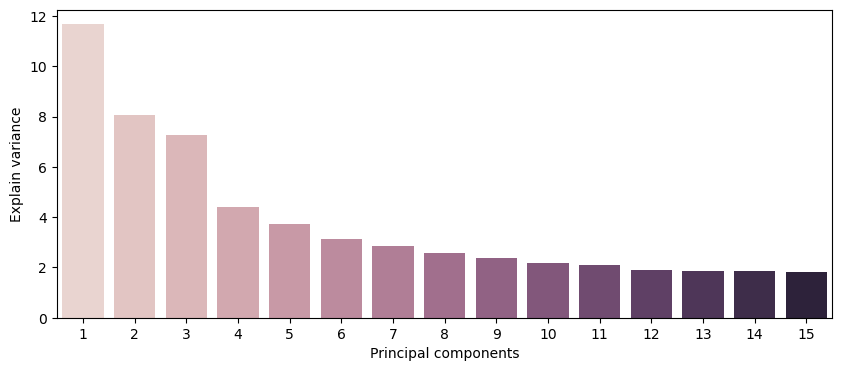

In [25]:
plt.figure(figsize=(10, 4))
pca=PCA(n_components=15)
pca.fit(X_scaled)
sns.barplot(x= np.arange(1,16) , y=pca.explained_variance_ratio_*100, hue=np.arange(1,16), legend=False)
plt.ylabel("Explain variance")
plt.xlabel("Principal components")

On observe de ce graphique qu'il y a deux coudes possibles, l'un √† la deuxi√®me composante et l'autre √† la sixi√®me composante. La premi√®re composante principale explique 11,66% de la variance totale, la deuxi√®me en explique 8,05%, la troisi√®me 7,27%, et √† partir de la sixi√®me composante principale, le pourcentage de variable expliqu√©e devient inf√©rieur √† 3%. Les facteurs restants ont donc un apport d'information n√©gligeable.

A ce graphique, on ajoute le graphique qui d√©crit l'√©volution de la variance expliqu√©e par les axes.

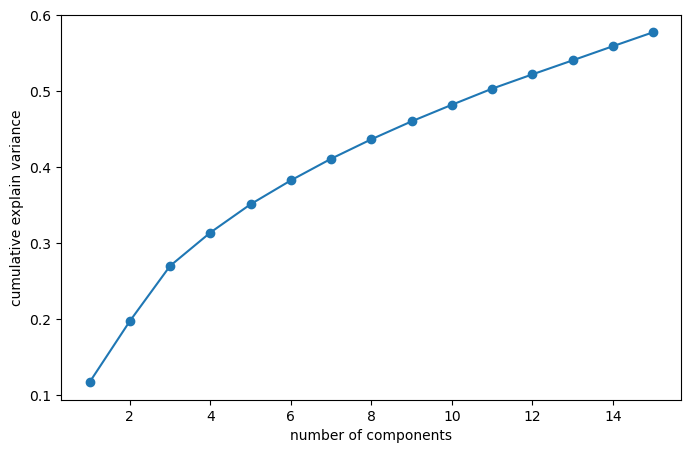

In [26]:
explained_variances=[]
for n in range(1,16):
    pca =PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8,5))
plt.plot(range(1,16), explained_variances, marker='o')
plt.xlabel("number of components")
plt.ylabel("cumulative explain variance")
plt.show()

Ce graphique semble indiquer que le coude se trouve √† la troisi√®me composante principale. Cependant, Considerer trois composantes principales n'est pas une bonne id√©e car on perdrais le gain d'information substanciel qu'apporte les 2 composantes principales suivantes. Les 5 premi√®res composantes principales expliquent environ 35% de l'information. Nous allons poursuivre cette recherche du nombre de composantes optimale en utilisant le test des b√¢tons bris√©s.

#### **Test des ¬´ b√¢tons bris√©s ¬ª**

Ce test est du √† Frontier (1976) et Legendre-Legendre (1983). Il repose sur l‚Äôid√©e que si l‚Äôinertie totale √©tait dispatch√©e al√©atoirement sur les axes, la distribution des valeurs propres suivrait la loi des 
¬´ b√¢tons bris√©s ¬ª (broken-stick). La valeur critique pour le choix des composantes principales s'√©crit comme suit:
$$ b_{k} = \sum_{i=k}^{p} \frac 1 {i}$$

o√π p repr√©sente le nombre de variables.

In [23]:
baton_coef=[]
for i in np.arange(1,16):
    n=0
    for j in range(i,117):
        n=n+(1/j)
    baton_coef.append(n)

In [24]:
data1=pd.DataFrame(data=pca.explained_variance_, columns=["eigen_values"])
data1["b_k"]=baton_coef
data1.index=["PC{}".format(i) for i in np.arange(1,16)]
data1

eigen_values       b_k
PC1      11.433010  5.335110
PC2       7.889850  4.335110
PC3       7.125282  3.835110
PC4       4.303626  3.501777
PC5       3.656622  3.251777
PC6       3.079037  3.051777
PC7       2.792477  2.885110
PC8       2.509312  2.742253
PC9       2.315227  2.617253
PC10      2.138628  2.506142
PC11      2.075094  2.406142
PC12      1.883521  2.315233
PC13      1.836884  2.231899
PC14      1.821218  2.154976
PC15      1.768835  2.083548

Avec ce test on peut retenir 5 composantes principales, car √† la diff√©rence entre la valeur propre de la sixi√®me composante principale et le seuil calcul√© est n√©gligeable. Pour les composantes suivantes, les valeurs propres sont en dessous du seuil.

Nous retiendrons donc 5 composantes principales dans la suite.

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 23px">
b)- Entrainement du mod√®le
</p>
<br/>

In [16]:
# training the model with 5 principal components
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
print("Explain variance for each component :",pca.explained_variance_ratio_)
print("cumulated variance :",pca.explained_variance_ratio_.sum())

Explain variance for each component : [0.11666279 0.08050827 0.0727066  0.04391469 0.03731249]
cumulated variance : 0.3511048318033728


In [17]:
# coefficients of the principal components 
print("Composantes principales (coefficients) :")
table_coef=pd.DataFrame(pca.components_, columns=data.select_dtypes(exclude='category').columns)
table_coef.index=["PC{}".format(i+1) for i in np.arange(0,5)]
table_coef

Composantes principales (coefficients) :


days_between_signup_and_first_activity  \
PC1                                0.066023   
PC2                               -0.008063   
PC3                               -0.011089   
PC4                               -0.012169   
PC5                                0.096430   

     days_between_order_and_first_activity  \
PC1                               0.075380   
PC2                              -0.011526   
PC3                              -0.024572   
PC4                              -0.023764   
PC5                               0.049827   

     days_between_first_and_last_activities  chapter_before_success_count  \
PC1                               -0.004304                 -2.710505e-20   
PC2                                0.001866                  0.000000e+00   
PC3                                0.029455                 -1.110223e-16   
PC4                               -0.102450                 -5.551115e-17   
PC5                                0.418300                  0.000000e+00   

     serie_before_success_count  quiz_before_success_count  \
PC1                    0.117614                   0.108084   
PC2                    0.064442                   0.019719   
PC3                   -0.054100                   0.053615   
PC4                   -0.172160                  -0.000519   
PC5                    0.002723                  -0.017382   

     theory_activities_total  percentage_activities_2_3_4h_week  \
PC1                 0.151237                          -0.005015   
PC2                 0.024426                           0.005472   
PC3                -0.048470                           0.009290   
PC4                -0.288067                          -0.011698   
PC5                 0.017505                           0.011653   

     percentage_activities_5_6_7h_week  percentage_activities_23_0_1h_week  \
PC1                           0.010848                            0.006412   
PC2                          -0.002838                            0.010553   
PC3                          -0.005749                            0.014140   
PC4                          -0.003291                           -0.014431   
PC5                           0.012641                            0.005018   

     ...  nb_weeks_weekly_study_objective_reached_80pct  \
PC1  ...                                       0.124556   
PC2  ...                                       0.309994   
PC3  ...                                       0.038576   
PC4  ...                                       0.053974   
PC5  ...                                      -0.000583   

     nb_weeks_weekly_study_objective_reached_75pct  \
PC1                                       0.124960   
PC2                                       0.305893   
PC3                                       0.037714   
PC4                                       0.051357   
PC5                                      -0.000302   

     nb_weeks_weekly_study_objective_reached_70pct  \
PC1                                       0.125143   
PC2                                       0.300151   
PC3                                       0.036979   
PC4                                       0.047793   
PC5                                       0.000038   

     nb_weeks_weekly_study_objective_not_reached  nb_weeks_no_activity  \
PC1                                     0.096558              0.017135   
PC2                                     0.033900              0.009572   
PC3                                     0.021819              0.007797   
PC4                                    -0.081462             -0.001142   
PC5                                     0.023226              0.006160   

     nb_weeks_no_weekly_study_objective  pct_study_objective_reached  \
PC1                           -0.004208                     0.089261   
PC2                            0.012058                     0.210167   
PC3                           -0.092366                     0.025101   

In [18]:
# contributions of the principal components
loadings=pca.components_.T
eigenvalues=pca.explained_variance_
contributions=(loadings**2)*eigenvalues
contrib_percent=contributions/(eigenvalues.sum())*100
contrib_df=pd.DataFrame(contrib_percent, columns=["PC{}".format(i+1) for i in np.arange(0,5)])
contrib_df.index=data.columns
contrib_df.head()

PC1       PC2           PC3  \
days_between_signup_and_first_activity  1.448413e-01  0.001491  2.546388e-03   
days_between_order_and_first_activity   1.888035e-01  0.003046  1.250339e-02   
days_between_first_and_last_activities  6.153829e-04  0.000080  1.796671e-02   
chapter_before_success_count            2.441159e-38  0.000000  2.552451e-31   
serie_before_success_count              4.596384e-01  0.095224  6.060847e-02   

                                                 PC4       PC5  
days_between_signup_and_first_activity  1.852225e-03  0.098820  
days_between_order_and_first_activity   7.063180e-03  0.026384  
days_between_first_and_last_activities  1.312800e-01  1.859487  
chapter_before_success_count            3.854193e-32  0.000000  
serie_before_success_count              3.707144e-01  0.000079

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 23px">
c)- Interpr√©taion des axes principaux
</p>
<br/>

Seront consid√©r√©es comme variables les plus contributrices √† la formation d'un axe principale, les variables dont la contribution est sup√©rieur √† la contribution moyenne, c'est-√†-dire: $$ 100/117 \approx 0.855 $$  

In [33]:
contrib1=pd.DataFrame(data=contrib_df["PC1"].sort_values(ascending=False)[:16].values, columns=["contribution"]) 
contrib1.index=contrib_df["PC1"].sort_values(ascending=False)[:16].index
contrib1["coefficient"]=table_coef[contrib1.index].iloc[0]
contrib1

contribution  coefficient
notions_diverses_number_of_activities              1.464529     0.209943
mecanique_equipements_number_of_activities         1.421391     0.206828
prendre_quitter_vehicule_number_of_activities      1.404160     0.205570
autres_usagers_number_of_activities                1.403937     0.205554
route_number_of_activities                         1.382899     0.204008
securite_number_of_activities                      1.377518     0.203611
premiers_secours_number_of_activities              1.370145     0.203065
environnement_number_of_activities                 1.323408     0.199572
conducteur_number_of_activities                    1.258079     0.194584
score_pct__quantile__q_0_4                         1.089173     0.181051
score_pct__quantile__q_0_3                         1.086840     0.180857
score_pct__c3__lag_1                               1.080334     0.180315
score_pct__c3__lag_2                               1.072191     0.179634
score_pct__c3__lag_3                               1.061034     0.178697
score_pct__quantile__q_0_2                         1.045177     0.177356
score_pct__quantile__q_0_1                         0.934065     0.167664

Les variables qui contribuent le plus √† la construction de la premi√®re composante principale sont des variables qui renseigne sur le nombre d'activit√© effectuer par th√©matique pour le permis de conduire (*notions_diverses_number_of_activities*, *mecanique_equipements_number_of_activities*,*securite_number_of_activities*, *route_number_of_activities*, *prendre_quitter_vehicule_number_of_activities*, *autres_usagers_number_of_activities*,etc.) et les statistiques qui r√©sultent des scores en pourcentage obtenus aux diff√©rents examens notamment les quantiles d'ordre 1, 2, 3 et 4 (*score_pct__quantile__q_0_1*, *score_pct__quantile__q_0_2*, *score_pct__quantile__q_0_3*, *score_pct__quantile__q_0_4*), et .... Cet axe r√©sume le signal et/ou la corr√©lation qui existe entre le nombre d'activit√©s effectu√©s par th√©matique et la distribution du score au diff√©rents examens. On pourrait donc dire qu'il traduit l'**efficacit√©** des √©tudiants.

De plus, en analysant les coefficients de ces variables, ont constate qu'elles sont toutes positifs. Ainsi, un individu ayant un coefficient √©lev√© sur cet axe, fait beaucoup d'activit√© sur les diff√©rentes th√©matiques d'apprentissage et a des scores √©lev√©s aux diff√©rents examens, ce qui signifie qu'il comprend bien ce qu'il fait.

In [34]:
contrib2=pd.DataFrame(data=contrib_df["PC2"].sort_values(ascending=False)[:9].values, columns=["contribution"]) 
contrib2.index=contrib_df["PC2"].sort_values(ascending=False)[:9].index
contrib2["coefficient"]=table_coef[contrib2.index].iloc[1]
contrib2

contribution  coefficient
nb_weeks_weekly_study_objective_reached_90pct      2.248430     0.313139
nb_weeks_weekly_study_objective_reached_85pct      2.236727     0.312323
nb_weeks_weekly_study_objective_reached_95pct      2.236287     0.312293
nb_weeks_weekly_study_objective_reached_99pct      2.216164     0.310884
nb_weeks_weekly_study_objective_reached            2.208697     0.310360
nb_weeks_weekly_study_objective_reached_80pct      2.203486     0.309994
nb_weeks_weekly_study_objective_reached_75pct      2.145577     0.305893
nb_weeks_weekly_study_objective_reached_70pct      2.065778     0.300151
pct_study_objective_reached                        1.012819     0.210167

Les variables qui contribuent fortement √† la deuxi√®me composante principale sont d'une part les variables qui renseignent sur le nombre de week-end o√π les objectifs d'√©tude hebdomadaire ont atteint un pourcentage donn√©e (90%,85%,95%,99%,75%,etc) et d'autre part les variables qui donnent le pourcentage d'objectifs d'√©tudes atteint le week-end (*nb_weeks_weekly_study_objective_reached*) et en dehors (*pct_study_objective_reached*). On pourrait dire que cet axe capture principalement l'information sur **l'intensit√© du travail personnel des √©tudiants**. 

De plus, le coefficient de toutes les variables qui contribuent le plus √† la formation de l'axe 2 sont positifs. Donc, les individus qui ont un coefficient √©lev√© et positif sur cet axe (se trouvant √† une extr√©mit√© de l'axe) sont beaucoup investit personnellement dans la formation.

In [35]:
contrib3=pd.DataFrame(data=contrib_df["PC3"].sort_values(ascending=False)[:8].values, columns=["contribution"]) #pas termin√©
contrib3.index=contrib_df["PC3"].sort_values(ascending=False)[:8].index
contrib3["coefficient"]=table_coef[contrib3.index].iloc[2]
contrib3 #pas termin√©

contribution  coefficient
score_pct__quantile__q_0_2                   1.378471    -0.258006
score_pct__quantile__q_0_3                   1.360804    -0.256348
score_pct__quantile__q_0_1                   1.323760    -0.252834
score_pct__quantile__q_0_4                   1.312995    -0.251804
score_pct__linear_trend__attr_intercept      1.145644    -0.235210
score_pct__c3__lag_1                         1.128279    -0.233421
score_pct__c3__lag_2                         1.074205    -0.227759
score_pct__c3__lag_3                         1.014902    -0.221383

Les variables qui contribuent fortement √† la 3e composante principale sont les variables qui caract√©risent la distribution du score en pourcentage (notamment les quantiles et ...) aux diff√©rents examens renseign√©es pour chaque √©tudiant. On peut dire que cet axe capture l'information sur **la progression des √©tudiants en terme de r√©sultats**. 

De plus, le fait que toutes ces variables ont un coefficient positif sur l'axe signifient qu'elles varient dans le m√™me sens que l'axe. Donc un √©tudiant ayant un coefficient tr√®s faible (n√©gatif) sur cet axe, obtient de mauvais r√©sultats aux diff√©rents examens, ce qui traduit le fait qu'ils n'assimilent pas bien les connaissances.

In [36]:
contrib4=pd.DataFrame(data=contrib_df["PC4"].sort_values(ascending=False)[:6].values, columns=["contribution"]) #pas termin√©
contrib4.index=contrib_df["PC4"].sort_values(ascending=False)[:6].index
contrib4["coefficient"]=table_coef[contrib4.index].iloc[3]
contrib4

contribution  coefficient
score_pct__standard_deviation         1.347974    -0.328287
score_pct__variation_coefficient      1.201303    -0.309913
score_pct__minimum                    1.165849     0.305305
nb_failed_series                      1.098504    -0.296356
theory_activities_total               1.037623    -0.288027
session_count                         0.984027    -0.280490

La mesure de la dispersion du score (*score_pct_standard_deviation*)  et la variation relative du score en pourcentage autour de la moyenne (*score_pct__variation_coefficient*)  contribuent majoritairement √† la formation de la 4e composante principale. Aussi, le nombre d'examens √©chou√©s (*nb_failed_series*), le total d'activit√©s th√©orique (*theory_activities_total*), le minimum du score en pourcentage (*score_pct_minimum*) , le nombre de session effectu√© (*session_count*), contribuent √©galement fortement √† la formation de cet axe. Cette composante semble donc √™tre fortement influenc√© par des variables li√©es √† **la performance acad√©mique, √† la r√©gularit√© aux examens**. 

De l'analyse des coefficients de ces variables, on observe que les variables qui donne le minimum du score en pourcentage et la derni√®re localisation du minimum du score ont des coefficients n√©gatifs. On pourrait donc dire que les individus ayant un score √©lev√© sur cette composante sont succeptibles d'avoir des performances tr√®s irr√©guli√®res (caract√©ris√©es par une dispersion √©lev√©e des scores), rencontrent r√©guli√®rement des √©checs et mettent du temps √† assimiler les comp√©tences (nombre de series √©chou√© √©lev√©), ce qui impliquent qu'ils doivent faire plus d'activit√©s, d'examen et de session (**theory_activities_total**,**session_count**).

In [37]:
contrib5=pd.DataFrame(data=contrib_df["PC5"].sort_values(ascending=False)[:4].values, columns=["contribution"]) #pas termin√©
contrib5.index=contrib_df["PC5"].sort_values(ascending=False)[:4].index
contrib5["coefficient"]=table_coef[contrib5.index].iloc[4]
contrib5

contribution  coefficient
minutes_between_sessions_max                2.023320     0.436339
days_between_first_and_last_activities      1.861276     0.418502
minutes_between_sessions_avg                1.572999     0.384730
minutes_between_sessions_std                1.467648     0.371623

Le maximum (*minutes_between_sessions_max*), la moyenne (*minutes_between_sessions_avg*), l'√©cart type (*minutes_between_sessions_std*) qui mesurent **la r√©gularit√© et la concentration des sessions d'apprentissage** contribuent fortement √† la formation de la cinqui√®me composante principale. Egalement, le nombre de jour entre la premi√®re activit√© et la derni√®re activit√© (*days_between_first_and_last_activities*) qui mesure **l'engagement totale de l'√©tudiant dans la formation**, contribue fortement √† la formation de cet axe.

Les coefficients de ces variables sont tous positifs, ce qui signifie que la composante varie dans le m√™me sens que ces variables. Donc, les individus ayant un coefficient positif √©lev√© sur cet axe (se situant √† une extr√©mit√© de l'axe) ont une formation √©tal√©e sur une longue p√©riode, des sessions d'apprentissage tr√®s irr√©guli√®res, avec de longues p√©riodes d'inactivit√© entre chaque session (un √©cart type √©lev√© sugg√®re des sessions tr√®s espac√©es dans le temps, et une m√©diane √©lev√©e indique des sessions moins fr√©quentes).

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 23px">
d)- Graphique des individus
</p>
<br/>

Nous allons repr√©senter les 20 premiers individus de la base sur les diff√©rents axes factorielles afin de voir concr√®tement ce qu'ils traduisent.

In [ ]:
x_pca=X_pca[1:20,:]

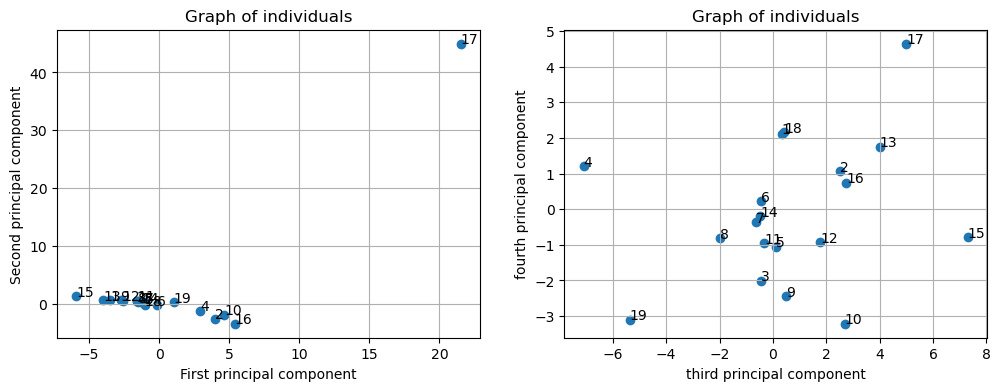

In [ ]:
plt.figure(figsize=(12, 4))
# construction of the first graph
plt.subplot(1, 2, 1)
plt.scatter(x_pca[:, 0], x_pca[:, 1])
labels = data.iloc[1:20,:].index # Utiliser les indices du DataFrame comme √©tiquettes
for i, label in enumerate(labels):
    plt.annotate(label, (x_pca[i, 0], x_pca[i, 1]))
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("Graph of individuals")
plt.grid(True)

# construction of the second graph
plt.subplot(1, 2, 2)
plt.scatter(x_pca[:, 2], x_pca[:, 3])
labels = data.iloc[1:20,:].index # Utiliser les indices du DataFrame comme √©tiquettes 
for i, label in enumerate(labels):
    plt.annotate(label, (x_pca[i, 2], x_pca[i, 3]))
plt.xlabel("third principal component")
plt.ylabel("fourth principal component")
plt.title("Graph of individuals")
plt.grid(True)

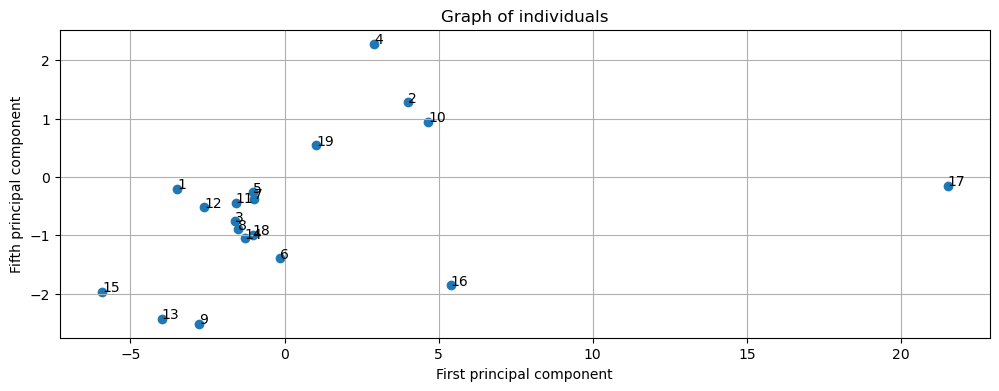

In [ ]:
#construction of the third graph 
plt.figure(figsize=(12, 4))
plt.scatter(x_pca[:, 0], x_pca[:, 4])
labels = data.iloc[1:20,:].index # Utiliser les indices du DataFrame comme √©tiquettes 
for i, label in enumerate(labels):
    plt.annotate(label, (x_pca[i, 0], x_pca[i, 4]))
plt.xlabel("First principal component")
plt.ylabel("Fifth principal component")
plt.title("Graph of individuals")
plt.grid(True)

Consid√©rons l'individu num√©ro 17. Il a un coefficient √©lev√© sur les deux premiers axes factoriels, ce qui signifie qu'il fait un grand nombre d'activit√©s par th√©matique d'apprentissage et √† de bons scores aux diff√©rentes session d'√©valuation. De plus il a un coefficient n√©gatif relativement faible sur le reste des axes factoriels, ce qui signifie qu'il a des scores peu dispers√© autour de la moyenne, il a de bonne performance acad√©mique et est plus ou moins r√©gulier aux sessions d'apprentissage. En bref, c'est un bon √©l√®ve.

Par contre, l'individu num√©ro 15 a un coefficient n√©gatif sur le premier axe factoriel, proche de 0 sur le deuxi√®me axe factoriel et n√©gatif sur le troisi√®me axe factoriel ce qui signifie qu'il ne fait relativement peu d'activit√©s par th√©matique d'apprentissage et n'a pas de bonnes performances acad√©mique. De plus, il a un coefficient n√©gatif sur le cinqui√®me axe factoriel et proche de 0 sur le quatri√®me et sixi√®me axe factoriel, ce qui traduit le fait qu'il est moin r√©gulier aux examens et ses sessions d'apprentissage sont moins concentr√©es.

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 23px">
d)- Erreur de reconstruction
</p>
<br/>

In [19]:
from sklearn.metrics import mean_squared_error
# reconstruction of the data with inverse_transform
X_reconstructed = pca.inverse_transform(X_pca)

# Calculer l'erreur de reconstruction (norme Euclidienne)
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)

In [20]:
print(f"Erreur de reconstruction : {reconstruction_error}")

Erreur de reconstruction : 0.543519029771535


In [27]:
# Calcul de l'information mutuelle entre les donn√©es originales et reconstruites
mi_scores = [mutual_info_regression(X_scaled[:, i].reshape(-1, 1), X_reconstructed[:, i]) for i in range(X_scaled.shape[1])]
#mean_mi = np.mean([np.mean(score) for score in mi_scores])
#print(f"Information mutuelle moyenne : {mean_mi:.4f}")
total_mi = np.sum(mi_scores)
print(f"Information mutuelle totale : {total_mi:.4f}")

Information mutuelle totale : 30.0488


In [29]:
from scipy.stats import entropy
def normalized_mutual_information(X_scaled, X_reconstructed):
    H_X = np.sum([entropy(np.histogram(X_scaled[:, i], bins=20)[0] + 1e-10) for i in range(X_scaled.shape[1])])  # Entropie totale
    I_X_Xhat = total_mi # Info mutuelle
    return I_X_Xhat / H_X  # Ratio d'info conserv√©e

# Calcul du taux d'information mutuelle conserv√©e
nmi = normalized_mutual_information(X_scaled, X_reconstructed)
print(f"Part d'information conserv√©e (normalis√©e) : {nmi:.2%}")

Part d'information conserv√©e (normalis√©e) : 31.77%


<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 25px">
<u>
2- Analyse Factorielle des Composantes Mixtes (FAMD) </u>
</p>
<br/>

<p>
Nous avons r√©alis√©s 5 FAMD sur les donn√©es(en R), puis nous avons export√© diff√©rents resultats int√©ressant(variance expliqu√©e, individu, variables).
</p>

In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# D√©finir le chemin o√π sont stock√©s les fichiers export√©s depuis R
export_path = r"C:/Users/damso/Documents/Projet_Statistique/"

# Liste des fichiers √† importer
famd_versions = ["famd0","famd1", "famd2", "famd3", "famd_final"]

# Dictionnaires pour stocker les dataframes import√©s
coord_ind_total = {}
coord_var_total = {}
variance_total = {}

# Boucle pour importer les fichiers CSV dans des dictionnaires
for famd in famd_versions:
    coord_ind_total[famd] = pd.read_csv(os.path.join(export_path, f"{famd}_coord_ind.csv"), index_col=0)
    coord_var_total[famd] = pd.read_csv(os.path.join(export_path, f"{famd}_coord_var.csv"), index_col=0)
    variance_total[famd] = pd.read_csv(os.path.join(export_path, f"{famd}_variance.csv"), index_col=0)

# Affichage des informations importantes

print(f"\n==== R√©sultats pour famd0 ====")
print(f"Nombre d'individus: {coord_ind_total["famd0"].shape[0]}")
print(f"Nombre de variables: {coord_var_total["famd0"].shape[0]}")
print(f"Nombre de composantes: {variance_total["famd0"].shape[0]}")
print("Pourcentage de variance expliqu√©e par chaque composante:\n", variance_total["famd0"].iloc[:, 1])



==== R√©sultats pour famd0 ====
Nombre d'individus: 200000
Nombre de variables: 371
Nombre de composantes: 30
Pourcentage de variance expliqu√©e par chaque composante:
 comp 1     20.413033
comp 2      2.524357
comp 3      2.003599
comp 4      1.746728
comp 5      1.533339
comp 6      1.007631
comp 7      0.913385
comp 8      0.868160
comp 9      0.845962
comp 10     0.837021
comp 11     0.826354
comp 12     0.809997
comp 13     0.799562
comp 14     0.781710
comp 15     0.775136
comp 16     0.744219
comp 17     0.728571
comp 18     0.716312
comp 19     0.713825
comp 20     0.699645
comp 21     0.698554
comp 22     0.678189
comp 23     0.676258
comp 24     0.666379
comp 25     0.651333
comp 26     0.639637
comp 27     0.626626
comp 28     0.619195
comp 29     0.613205
comp 30     0.604893
Name: percentage of variance, dtype: float64


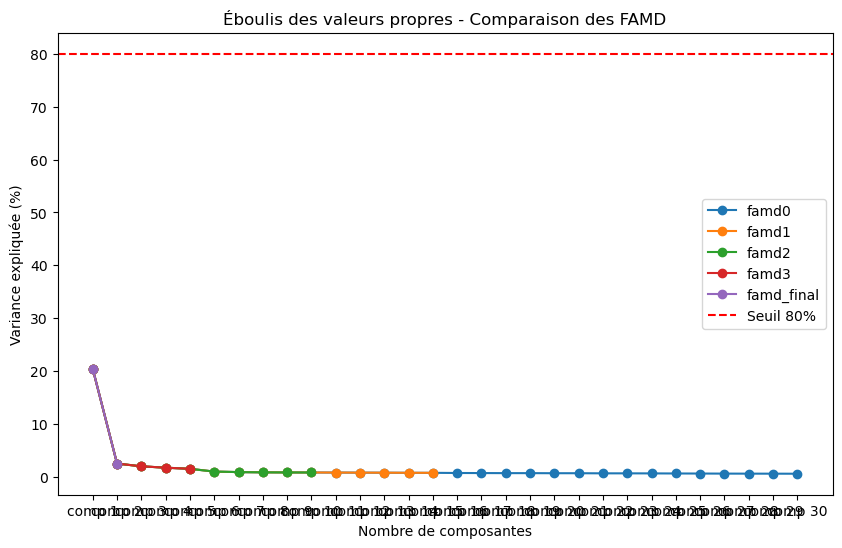

In [3]:
plt.figure(figsize=(10, 6))
for famd in famd_versions:
    plt.plot(variance_total[famd].index, variance_total[famd].iloc[:, 1], marker='o', label=famd)

plt.axhline(y=80, color='r', linestyle='--', label="Seuil 80%")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliqu√©e (%)")
plt.title("√âboulis des valeurs propres - Comparaison des FAMD")
plt.legend()
plt.show()


## Distribution des individus dans les deux premi√®res dimensions pour chaque cas

Composante 1 et 2

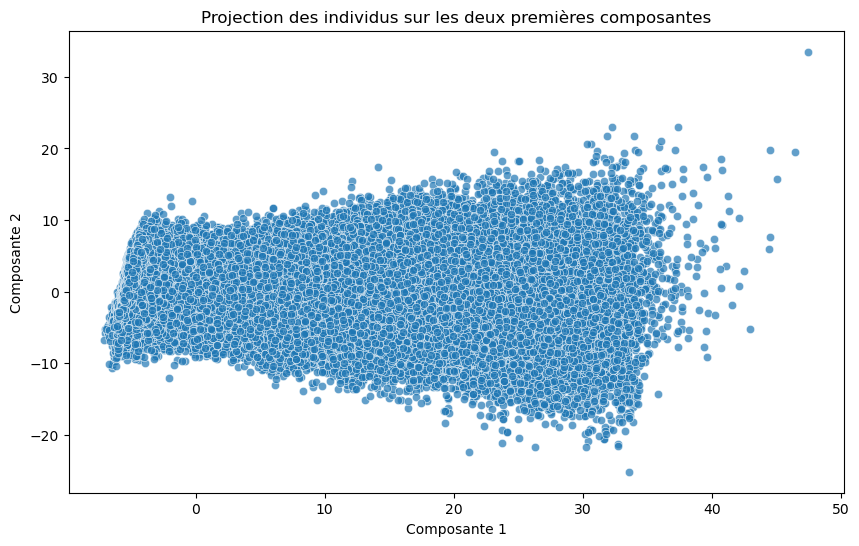

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=coord_ind_total["famd0"].iloc[:, 0], 
                y=coord_ind_total["famd0"].iloc[:, 1], 
                alpha=0.7)
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("Projection des individus sur les deux premi√®res composantes")
plt.show()

Composantes 2 et 3

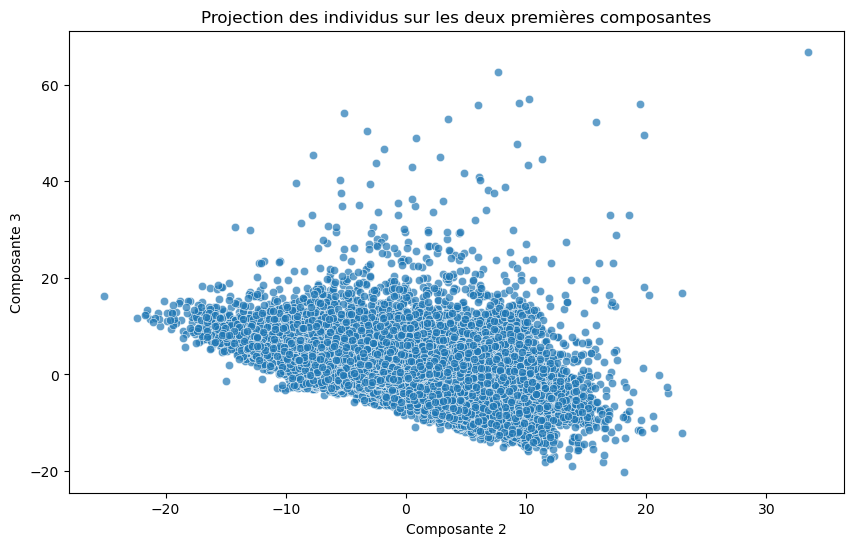

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=coord_ind_total["famd0"].iloc[:, 1], 
                y=coord_ind_total["famd0"].iloc[:, 2], 
                alpha=0.7)
plt.xlabel("Composante 2")
plt.ylabel("Composante 3")
plt.title("Projection des individus sur les deux premi√®res composantes")
plt.show()

composantes 3 et 4

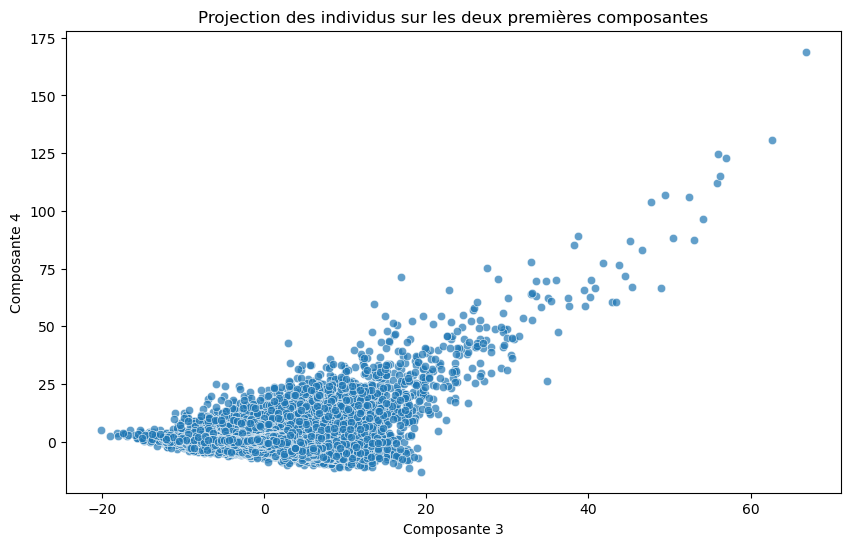

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=coord_ind_total["famd2"].iloc[:, 2], 
                y=coord_ind_total["famd2"].iloc[:, 3], 
                alpha=0.7)
plt.xlabel("Composante 3")
plt.ylabel("Composante 4")
plt.title("Projection des individus sur les deux premi√®res composantes")
plt.show()

composantes 4 et 5

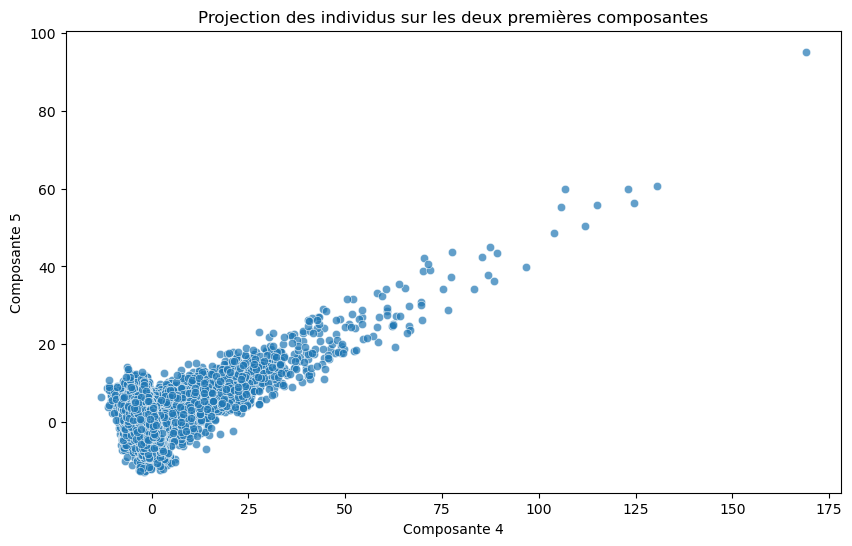

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=coord_ind_total["famd0"].iloc[:, 3], 
                y=coord_ind_total["famd0"].iloc[:, 4], 
                alpha=0.7)
plt.xlabel("Composante 4")
plt.ylabel("Composante 5")
plt.title("Projection des individus sur les deux premi√®res composantes")
plt.show()

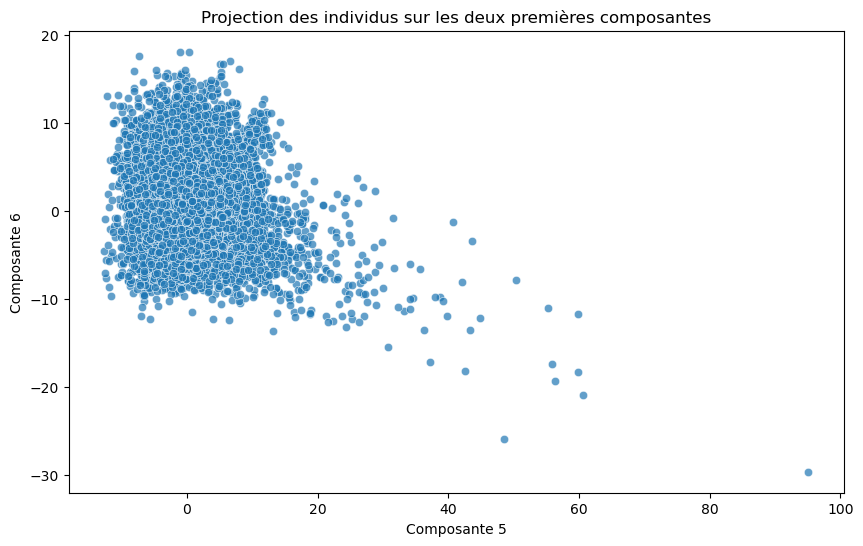

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=coord_ind_total["famd0"].iloc[:, 4], 
                y=coord_ind_total["famd0"].iloc[:, 5], 
                alpha=0.7)
plt.xlabel("Composante 5")
plt.ylabel("Composante 6")
plt.title("Projection des individus sur les deux premi√®res composantes")
plt.show()


<br/>
L'√©volution des distributions obtenue par la r√©duction des dimensions via la FAMD (Factorial Analysis of Mixed Data) peut √™tre interpr√©t√©e √† travers plusieurs aspects cl√©s :

### 1. **Projection des individus**
Les graphiques montrent la projection d'individus sur les premi√®res composantes principales, ce qui permet de visualiser la structure sous-jacente des donn√©es. Chaque point repr√©sente un individu, et leur disposition dans le plan r√©v√®le des tendances et des regroupements.

### 2. **Dispersion des points**
- **Premier graphique :** Les points sont relativement dispers√©s, indiquant une diversit√© dans les donn√©es. La forme globale peut sugg√©rer des groupes potentiels.
- **Deuxi√®me graphique :** La concentration des points reste similaire, mais on peut observer une l√©g√®re tendance √† une distribution plus lin√©aire.
- **Troisi√®me graphique :** Une tendance plus marqu√©e appara√Æt, avec une augmentation des points dans une direction particuli√®re, indiquant potentiellement un gradient ou une corr√©lation entre certaines variables.
- **Quatri√®me graphique :** La projection montre une distribution similaire, mais sur un autre axe, ce qui pourrait signaler des relations entre diff√©rentes dimensions.
- **Cinqui√®me graphique :** La concentration des points dans cette projection sugg√®re qu'il y a des variables qui partagent une relation commune.

### 3. **Interpr√©tation des axes**
Les axes des graphiques (composantes 1, 2, 3, etc.) repr√©sentent des combinaisons lin√©aires des variables originales. L'interpr√©tation de ces axes d√©pend des variables qui les composent. Une analyse plus approfondie des contributions des variables aux composantes peut r√©v√©ler quelles variables sont les plus influentes dans la formation de ces groupes.

### 4. **Observations globales**
- **Tendances lin√©aires :** L'apparition de tendances lin√©aires dans plusieurs graphiques peut indiquer des relations corr√©latives parmi certaines variables.

En r√©sum√©, cette s√©rie de graphiques permet de visualiser la structure des donn√©es apr√®s r√©duction de dimensions, mettant en lumi√®re des tendances et des relations potentielles parmi les individus observ√©s. 
<br/>
<br/>


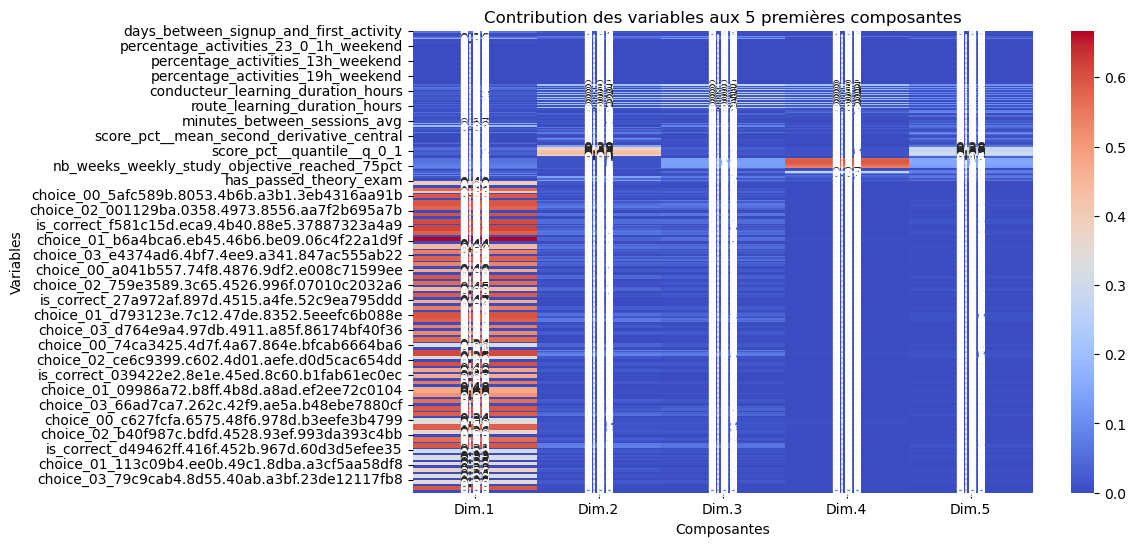

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(coord_var_total["famd0"].iloc[:, :5], cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Contribution des variables aux 5 premi√®res composantes")
plt.xlabel("Composantes")
plt.ylabel("Variables")
plt.show()


Le graphique que vous avez partag√© semble repr√©senter la contribution des variables aux cinq premi√®res composantes principales r√©sultant d'une analyse FAMD. Voici une interpr√©tation d√©taill√©e :

### 1. **Structure du graphique**
- **Axes :** L'axe des abscisses repr√©sente les cinq premi√®res composantes (Dim 1 √† Dim 5), tandis que l'axe des ordonn√©es liste les diff√©rentes variables analys√©es.
- **Coloration :** Les couleurs (typiquement des nuances de bleu et de rouge) indiquent l'ampleur de la contribution des variables √† chaque composante. G√©n√©ralement, les couleurs plus fonc√©es ou plus satur√©es signalent une contribution plus importante.

### 2. **Interpr√©tation des contributions**
- **Variables significatives :** Les variables qui montrent une couleur plus intense (bleu fonc√©, par exemple) pour une composante donn√©e sont celles qui contribuent le plus √† cette composante. Cela signifie qu'elles capturent une grande partie de la variance expliqu√©e par cette composante.
- **Distribution des contributions :** En examinant chaque composante, vous pouvez identifier quelles variables ont un impact positif ou n√©gatif. Par exemple, si une variable a une forte contribution positive sur Dim 1, elle influence fortement cette dimension dans le sens positif.

### 3. **Identification des tendances**
- **Composantes principales :** Les premi√®res composantes (Dim 1 et Dim 2) sont souvent les plus importantes, car elles capturent la majorit√© de la variance. Si certaines variables sont fortement associ√©es √† ces dimensions, elles m√©ritent une attention particuli√®re dans l'analyse.
- **Variabilit√© entre dimensions :** En observant les contributions √† travers plusieurs dimensions, on peut voir si certaines variables sont constantes dans leur influence ou si elles changent significativement d'une dimension √† l'autre.

### 4. **Implications pour l'analyse**
- **Focus sur les variables cl√©s :** Les variables qui contribuent le plus aux premi√®res composantes peuvent √™tre des cibles prioritaires pour des analyses plus approfondies, des visualisations ou des d√©cisions strat√©giques.
- **Exploration de corr√©lations :** Certaines variables peuvent montrer des contributions oppos√©es sur diff√©rentes dimensions, ce qui peut indiquer des relations complexes entre elles.


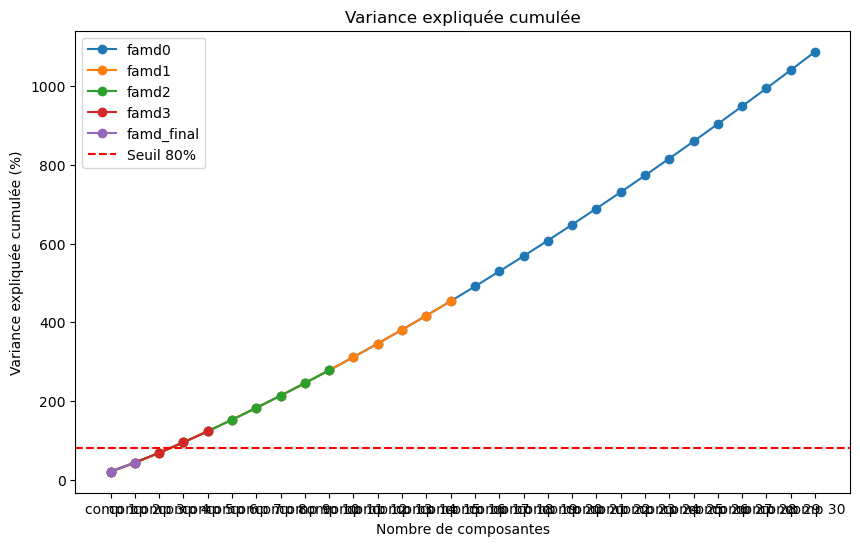

In [6]:
plt.figure(figsize=(10, 6))
for famd in famd_versions:
    plt.plot(variance_total[famd].index, variance_total[famd].iloc[:, 2].cumsum(), marker='o', label=famd)

plt.axhline(y=80, color='r', linestyle='--', label="Seuil 80%")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliqu√©e cumul√©e (%)")
plt.title("Variance expliqu√©e cumul√©e")
plt.legend()
plt.show()


Plus le nombre de dimension est elev√©, plus  la variance cumul√©e expliqu√©e est √©lev√©.

Le graphique que vous avez partag√© repr√©sente la variance expliqu√©e cumul√©e par les diff√©rentes composantes principales r√©sultant d'une analyse FAMD. Voici une interpr√©tation d√©taill√©e :

### 1. **Structure du graphique**
- **Axes :** L'axe des abscisses repr√©sente le nombre de composantes, tandis que l'axe des ordonn√©es indique la variance expliqu√©e cumul√©e (en pourcentage).
- **Curves color√©es :** Chaque courbe repr√©sente une s√©rie de donn√©es (fam0, fam1, fam2, fam3, fam_final), montrant comment la variance expliqu√©e √©volue avec l'ajout de chaque composante.

### 2. **Interpr√©tation de la variance expliqu√©e**
- **Variance expliqu√©e cumul√©e :** Le graphique montre comment la somme des variances expliqu√©es augmente avec le nombre de composantes. Une courbe qui s'√©l√®ve rapidement au d√©but indique que les premi√®res composantes capturent une grande partie de la variance.
- **Seuil de variance :** La ligne rouge (seuil) peut repr√©senter un niveau minimal de variance que l'on souhaite atteindre pour retenir un nombre optimal de composantes. Par exemple, si ce seuil est fix√© √† 70%, on peut d√©terminer combien de composantes sont n√©cessaires pour atteindre ce niveau.

### 3. **Tendances observ√©es**
- **Comportement des courbes :** Si certaines courbes atteignent le seuil de variance plus t√¥t que d'autres, cela indique que les variables associ√©es √† ces courbes sont plus efficaces pour expliquer la variance dans le jeu de donn√©es.
- **√âquilibre entre complexit√© et performance :** Si une courbe montre une pente plus douce apr√®s un certain nombre de composantes, cela peut sugg√©rer qu'ajouter d'autres composantes n'apporte qu'un faible gain en termes de variance expliqu√©e.



<h2>
Informations sur les dimensions(composantes) conserv√©es
</h2>

In [25]:
variance_total["famd0"]

eigenvalue  percentage of variance  cumulative percentage of variance
comp 1    92.062778               20.413033                          20.413033
comp 2    11.384850                2.524357                          22.937390
comp 3     9.036232                2.003599                          24.940989
comp 4     7.877744                1.746728                          26.687717
comp 5     6.915358                1.533339                          28.221056
comp 6     4.544415                1.007631                          29.228686
comp 7     4.119365                0.913385                          30.142071
comp 8     3.915400                0.868160                          31.010231
comp 9     3.815290                0.845962                          31.856193
comp 10    3.774965                0.837021                          32.693214
comp 11    3.726858                0.826354                          33.519568
comp 12    3.653088                0.809997                          34.329566
comp 13    3.606027                0.799562                          35.129128
comp 14    3.525513                0.781710                          35.910839
comp 15    3.495863                0.775136                          36.685974
comp 16    3.356429                0.744219                          37.430194
comp 17    3.285856                0.728571                          38.158765
comp 18    3.230569                0.716312                          38.875077
comp 19    3.219351                0.713825                          39.588903
comp 20    3.155398                0.699645                          40.288547
comp 21    3.150477                0.698554                          40.987101
comp 22    3.058632                0.678189                          41.665290
comp 23    3.049922                0.676258                          42.341548
comp 24    3.005367                0.666379                          43.007926
comp 25    2.937511                0.651333                          43.659259
comp 26    2.884764                0.639637                          44.298896
comp 27    2.826083                0.626626                          44.925522
comp 28    2.792569                0.619195                          45.544717
comp 29    2.765555                0.613205                          46.157922
comp 30    2.728067                0.604893                          46.762815

 <b> les deux premi√®res  dimensions, qui contiennent des informations sur 372 variables(de "days_between_signup_and_first_activity" √† "unique_learner_id") et expliquent  22,93% environ de la variance totale. √† partir de 7 composantes nous avons 30% de variance expliqu√©e</b>

[20.41303277  2.52435693  2.00359905  1.74672813  1.5333388   1.00763073
  0.91338463  0.86815964  0.84596238  0.83702106  0.82635435  0.80999738
  0.79956242  0.78171026  0.77513592  0.74421931  0.72857128  0.71631246
  0.71382505  0.69964476  0.69855368  0.67818902  0.67625774  0.66637854
  0.65133271  0.63963715  0.62662602  0.61919498  0.61320504  0.60489292]
üîπ Nombre optimal de dimensions pour famd1 selon la m√©thode de Kaiser = 6


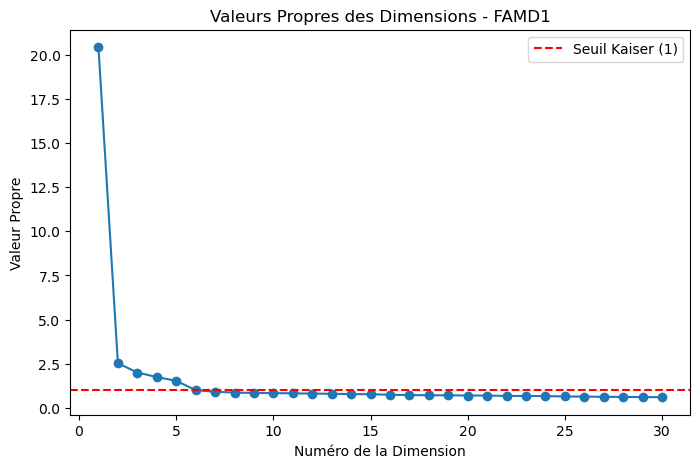

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Extraire les valeurs propres de famd1 (premi√®re colonne)
eigenvalues = np.array(variance_total["famd0"].iloc[:, 1])  # Prend bien la variance brute
print(eigenvalues)
# M√©thode de Kaiser : garder les composantes avec variance > 1
optimal_dimensions = np.sum(eigenvalues > 1)

print(f"üîπ Nombre optimal de dimensions pour famd1 selon la m√©thode de Kaiser = {optimal_dimensions}")

# Tracer les valeurs propres
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.axhline(y=1, color='red', linestyle='--', label='Seuil Kaiser (1)')
plt.title("Valeurs Propres des Dimensions - FAMD1")
plt.xlabel("Num√©ro de la Dimension")
plt.ylabel("Valeur Propre")
plt.legend()
plt.show()


<h2> La m√©thode de Kaiser nous sugg√®re via ce graphique de ne conserver que les 6 premi√®res 1<sup>ere</sup> composantes
</h2>

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 25px">
<u>
3- Auto Encoder </u>
</p>
<br/>

Nous commencons d'abord par exclure les identifiants ainsi que la variable de type datetime de la base q qui ne pr√©sentent aucun int√©r√™t pour notre auto encoder

Pour des raisons li√©es √† la puissance de calcul, nous nous servirons de la moit√© des observations pour notre Auto-Encoder. 

In [ ]:
base_AE=base_Edu.select_dtypes(exclude="datetime").drop(columns="unique_learner_id",axis=1).head(30000)

Les r√©sultats obtenus avec un Auto-Encoder d√©pendent de la valeur de la dimension de l'espace latent choisi c'est √† dire le nombre de variables de sorties. Dans un premier temps, nous r√©aliserons donc l'Auto-Encoder pour plusieurs valeurs de l'hyperparam√®tre (k allant de 1 √† 20) et au vu des r√©sultats d√©ciderons d'une valeur optimale du param√®tre 

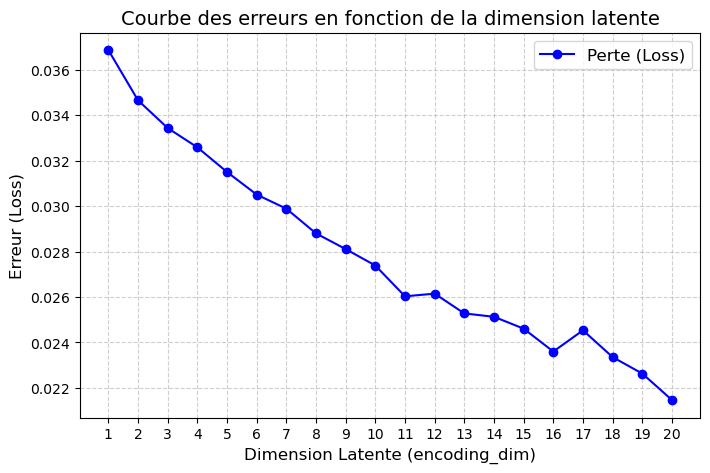

In [ ]:
import numpy as np
import tensorflow as tf
import random
import pandas as pd
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import os

# === 1. Fixer les graines pour la reproductibilit√© ===
seed_value = 123
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)
os.environ['PYTHONHASHSEED'] = str(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# === 2. Pr√©paration des donn√©es ===
# R√©cup√©rer les colonnes num√©riques et cat√©goriques
numerical_cols = base_AE.select_dtypes(include=['int', 'float']).columns
categorical_cols = base_AE.select_dtypes(include=['category', 'object']).columns

# Encodage des variables cat√©goriques avec OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_cats = encoder.fit_transform(base_AE[categorical_cols])

# R√©cup√©rer les noms des colonnes g√©n√©r√©es par OneHotEncoder
encoded_cat_columns = encoder.get_feature_names_out(categorical_cols)

# Centrage et r√©duction des variables num√©riques
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_nums = scaler.fit_transform(base_AE[numerical_cols])

# Fusionner les donn√©es encod√©es et normalis√©es
final_data = np.hstack([encoded_cats, scaled_nums])

# Concat√©ner les noms des colonnes finales
final_columns = list(encoded_cat_columns) + list(numerical_cols)

# Diviser les donn√©es en ensembles d'entra√Ænement et de test
x_train, x_test = train_test_split(final_data, test_size=0.3, random_state=seed_value)

# Dimensions de l'entr√©e
input_dim = x_train.shape[1]

# === 3. Entra√Ænement des autoencodeurs pour diff√©rentes dimensions latentes ===
results = []

for encoding_dim in range(1, 21):  # Tester des dimensions latentes de 1 √† 20
    # Initialisation d√©terministe des poids
    initializer = tf.keras.initializers.GlorotUniform(seed=seed_value)

    # Construction de l'autoencodeur
    input_img = Input(shape=(input_dim,))
    # Encodeur
    Hidden1 = Dense(256, activation='relu', kernel_initializer=initializer)(input_img)
    Hidden2 = Dense(128, activation='relu', kernel_initializer=initializer)(Hidden1)
    Hidden3 = Dense(64, activation='relu', kernel_initializer=initializer)(Hidden2)
    encoded = Dense(encoding_dim, activation='linear', kernel_initializer=initializer)(Hidden3)

    # D√©codeur
    Hidden_output1 = Dense(64, activation='relu', kernel_initializer=initializer)(encoded)
    Hidden_output2 = Dense(128, activation='relu', kernel_initializer=initializer)(Hidden_output1)
    Hidden_output3 = Dense(256, activation='relu', kernel_initializer=initializer)(Hidden_output2)
    decoded = Dense(input_dim, activation='sigmoid', kernel_initializer=initializer)(Hidden_output3)#Plus touche


    # Cr√©er le mod√®le
    autoencoder = Model(input_img, decoded)

    # Compiler le mod√®le
    autoencoder.compile(optimizer='adam', loss='mse')

    # Entra√Æner le mod√®le
    history = autoencoder.fit(
        x_train, x_train,
        epochs=50,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test),
        verbose=0
    )

    # R√©cup√©rer la perte de validation √† la derni√®re √©poque
    final_loss = history.history['val_loss'][-1]

    # Ajouter la dimension et la perte au tableau des r√©sultats
    results.append({'encoding_dim': encoding_dim, 'loss': final_loss})

# === 4. Visualisation des r√©sultats ===
df_results = pd.DataFrame(results)

plt.figure(figsize=(8, 5))
plt.plot(df_results['encoding_dim'], df_results['loss'], marker='o', linestyle='-', color='b', label='Perte (Loss)')
plt.xlabel('Dimension Latente (encoding_dim)', fontsize=12)
plt.ylabel('Erreur (Loss)', fontsize=12)
plt.title('Courbe des erreurs en fonction de la dimension latente', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(df_results['encoding_dim'])
plt.legend(fontsize=12)
plt.show()


Le graphique pr√©c√©dent repr√©sente la courbe des erreurs en fonctions des valeurs de l'hyperparam√®tre k allant de 1 √† 20. Elle pr√©sente globalement une tendence lin√©aire d√©croissante. Nous choississons de retenir pour notre autoencoder la valeur de l'hyperparam√®tre k=11 qui nous donne environ 0.0260 pour l'erreur de reconstruction ce qui est relativement faible. Le choix de k=11 pour l‚Äôautoencoder repose sur un compromis optimal entre compression et qualit√© de reconstruction. Ce seuil permet de capturer l‚Äôessentiel de l‚Äôinformation tout en limitant la complexit√© du mod√®le, r√©duisant ainsi le risque d‚Äôoverfitting. En conservant un faible nombre de variables latentes, le mod√®le reste efficace et interpr√©table tout en garantissant une bonne g√©n√©ralisation des donn√©es. 

Epoch 1/50
83/83 [==============================] - 4s 28ms/step - loss: 0.0635 - val_loss: 0.0394
Epoch 2/50
83/83 [==============================] - 2s 20ms/step - loss: 0.0399 - val_loss: 0.0381
Epoch 3/50
83/83 [==============================] - 1s 18ms/step - loss: 0.0382 - val_loss: 0.0360
Epoch 4/50
83/83 [==============================] - 1s 17ms/step - loss: 0.0365 - val_loss: 0.0350
Epoch 5/50
83/83 [==============================] - 1s 17ms/step - loss: 0.0354 - val_loss: 0.0342
Epoch 6/50
83/83 [==============================] - 2s 20ms/step - loss: 0.0344 - val_loss: 0.0334
Epoch 7/50
83/83 [==============================] - 1s 17ms/step - loss: 0.0337 - val_loss: 0.0326
Epoch 8/50
83/83 [==============================] - 2s 19ms/step - loss: 0.0330 - val_loss: 0.0322
Epoch 9/50
83/83 [==============================] - 2s 19ms/step - loss: 0.0326 - val_loss: 0.0317
Epoch 10/50
83/83 [==============================] - 2s 19ms/step - loss: 0.0322 - val_loss: 0.0314
Epoch 11/

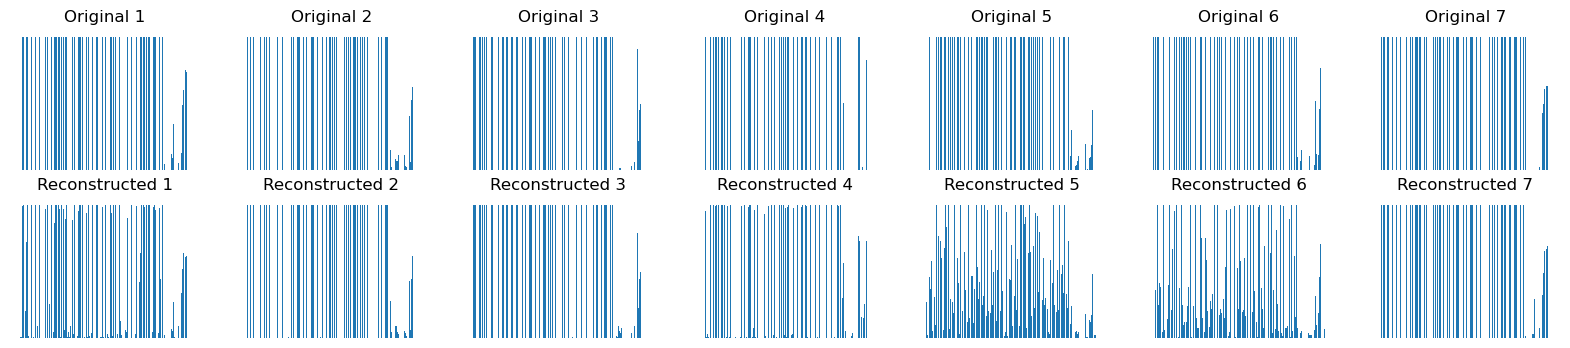

Erreur moyenne de reconstruction : 0.0260


In [ ]:
# === 2. D√©finition de l'autoencodeur ===
input_dim = x_train.shape[1]  # Assurez-vous que x_train est bien d√©fini
encoding_dim = 11

# Initialisation d√©terministe des poids
initializer = tf.keras.initializers.GlorotUniform(seed=seed_value)

# Encodeur
Hidden1 = Dense(256, activation='relu', kernel_initializer=initializer)(input_img)
Hidden2 = Dense(128, activation='relu', kernel_initializer=initializer)(Hidden1)
Hidden3 = Dense(64, activation='relu', kernel_initializer=initializer)(Hidden2)
encoded = Dense(encoding_dim, activation='linear', kernel_initializer=initializer)(Hidden3)

# D√©codeur
Hidden_output1 = Dense(64, activation='relu', kernel_initializer=initializer)(encoded)
Hidden_output2 = Dense(128, activation='relu', kernel_initializer=initializer)(Hidden_output1)
Hidden_output3 = Dense(256, activation='relu', kernel_initializer=initializer)(Hidden_output2)
decoded = Dense(input_dim, activation='sigmoid', kernel_initializer=initializer)(Hidden_output3)#Plus touche

# Mod√®le autoencodeur
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Entra√Ænement du mod√®le
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test),
                          verbose=1)

# Mod√®le de l'encodeur seul
encoder = Model(input_img, encoded)

# Repr√©sentations encod√©es (latent space)
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# === 4. Visualisation des performances ===
n = 7
plt.figure(figsize=(20, 4))

for i in range(n):
    # Donn√©es originales
    ax = plt.subplot(2, n, i + 1)
    plt.bar(range(len(x_test[i])), x_test[i])
    plt.title(f"Original {i+1}")
    plt.axis('off')

    # Reconstructions
    ax = plt.subplot(2, n, i + 1 + n)
    plt.bar(range(len(decoded_imgs[i])), decoded_imgs[i])
    plt.title(f"Reconstructed {i+1}")
    plt.axis('off')

plt.show()

# Analyse des erreurs de reconstruction
reconstruction_error = np.mean((x_test - decoded_imgs) ** 2, axis=1)
print(f"Erreur moyenne de reconstruction : {np.mean(reconstruction_error):.4f}")


Le graphIque pr√©c√©dent fait une comparaison entre les 7 premi√®res donn√©es originales et leurs versions reconstruites (pour une dimension k=10 de l'espace latent). Et la ressemblence oberv√©e est tr√®s forte. Cela t√©moigne du fait que la valeur k=10 de l'hyperparam√®tre suffit √† capturer efficacement la structure initiale de nos donn√©es. 

Nous essaierons maintenant de quantifier la part d'information conserv√© avec l'autoencoder dans le but d'√©valuer sa performance. Pour cel√†, deux approches seront utilis√©es : 
* *La variance espliqu√©e*

L'approche de la **variance totale par colonne** consiste √† mesurer la dispersion des valeurs de chaque variable (ou colonne) dans un jeu de donn√©es et √† calculer la variance pour chaque variable individuellement. Ensuite, on additionne ces variances pour obtenir la **variance totale** des donn√©es originales et reconstruites. Cette m√©thode permet de quantifier la quantit√© d'information conserv√©e dans les donn√©es reconstruites en comparant la variance totale des donn√©es originales avec celle des reconstructions. Toutefois, cette approche repose sur l'hypoth√®se que les variables sont **ind√©pendantes**. Elle ne prend pas en compte les relations de **corr√©lation** ou de **d√©pendance** entre les variables, ce qui peut √™tre une limitation lorsque les variables sont fortement li√©es. En d√©pit de cela, elle reste une m√©thode simple et efficace pour estimer globalement l'information pr√©serv√©e apr√®s la reconstruction des donn√©es.

* *L'information mutuelle* 

L‚Äôinformation mutuelle est une mesure issue de la th√©orie de l‚Äôinformation qui quantifie la d√©pendance entre deux variables al√©atoires. Elle indique la quantit√© d‚Äôinformation que l‚Äôon peut obtenir sur une variable en connaissant l‚Äôautre. Dans le cadre d‚Äôun autoencoder, elle permet d‚Äô√©valuer combien d‚Äôinformation sur les donn√©es originales $X$ est pr√©serv√©e apr√®s reconstruction $ùëã_{hat}$.  

L‚Äôentropie, quant √† elle, mesure l‚Äôincertitude ou la dispersion d‚Äôune variable al√©atoire. Plus une distribution est uniforme, plus son entropie est √©lev√©e. Ici, l'entropie totale des variables d'origine $H(X)$ est utilis√©e pour normaliser l'information mutuelle 
$I(X,X_{hat})$, ce qui permet d‚Äôobtenir un taux d‚Äôinformation mutuelle conserv√©e. Cette approche est plus interpr√©table que l‚Äôerreur quadratique moyenne (MSE), car elle capture la structure et la d√©pendance des donn√©es plut√¥t que de simples √©carts num√©riques.

Nous commencons par l'approche se basant sur la variance expliqu√©e

In [ ]:
import numpy as np

# Supposons que X_original et X_reconstructed sont tes donn√©es originales et reconstruites
#X_original = ...  # Tes donn√©es originales
X_reconstructed = autoencoder.predict(x_test) #...  # Tes donn√©es reconstruites

# Calculer la variance totale des donn√©es originales
total_variance_original = np.var(x_test, axis=0).sum()

# Calculer la variance totale des donn√©es reconstruites
total_variance_reconstructed = np.var(X_reconstructed, axis=0).sum()

# Calculer la part d'information conserv√©e
info_conserved = (total_variance_reconstructed / total_variance_original) * 100

print(f"Part d'information conserv√©e : {info_conserved:.2f}%")


282/282 [==============================] - 1s 5ms/step
Part d'information conserv√©e : 61.14%


En se basant sur l'hypoth√®se d'ind√©pendance entre les variables (ce qui n'est aps tr√®s √©vident), nous retrouvons comme r√©sultat que notre autoencoder explique environ 61.14% de la variance de nos donn√©es originales, ce qui n'est pas n√©gligeable et est plut√¥t rassurant. Mais le faible qu'elle se base sur une hypoth√®se peu r√©aliste la rend peu fiable

In [ ]:
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import entropy
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# === 3. Taux d'information conserv√©e avec l'information mutuelle ===

def compute_mutual_information(X, X_hat):
    mi_scores = []
    for i in range(X.shape[1]):  # Calcul de l'info mutuelle pour chaque variable
        mi = mutual_info_regression(X_hat[:, i].reshape(-1, 1), X[:, i])
        mi_scores.append(mi[0])  # mutual_info_regression renvoie une liste
    
    total_mi = np.sum(mi_scores)  # Somme sur toutes les variables
    return total_mi

def normalized_mutual_information(X, X_hat):
    H_X = np.sum([entropy(np.histogram(X[:, i], bins=20)[0] + 1e-10) for i in range(X.shape[1])])  # Entropie totale
    I_X_Xhat = compute_mutual_information(X, X_hat)  # Info mutuelle
    return I_X_Xhat / H_X  # Ratio d'info conserv√©e

# Calcul du taux d'information mutuelle conserv√©e
mi = compute_mutual_information(x_test, decoded_imgs)
nmi = normalized_mutual_information(x_test, decoded_imgs)
print(f"Information mutuelle totale : {mi:.4f}")
print(f"Part d'information conserv√©e (normalis√©e) : {nmi:.2%}")


Information mutuelle totale : 119.9409
Part d'information conserv√©e (normalis√©e) : 46.96%


Les r√©sultats de l'approche par l'information mutuelle montrent que l'autoencoder conserve environ **47% de l'information** des donn√©es originales. Bien que ce chiffre indique une certaine perte d'information, il est globalement satisfaisant, car il montre que l'autoencoder r√©ussit √† pr√©server une proportion significative de l'information tout en r√©duisant la dimensionnalit√© des donn√©es. Cela sugg√®re que l'autoencoder est assez performant dans la reconstruction des donn√©es tout en conservant l'essentiel des relations entre les variables.

L'approche par l'information mutuelle 

In [ ]:
autoencoder.save("autoencoder_model.h5")

Nous allons maintenant passer √† l'interpr√©tation des nos 10 variables latentes. Mais pour le faire il nous faut savoir quelles variables d'origines ont plus d'influence sur chacun des variables latentes. Pour capturer cette information, nous utiliserons la m√©thode GradiantExplainer de la biblioth√®que shap qui nous donnera une approximation de l'effet d'une pertubation √©l√©mentaire de chacune des variables d'origine suer chacune des variables latentes. Ce effet sera utiliser pour d√©terminer quelles variables de d√©part influencent le plus quelle variable latente 

In [ ]:
import shap

# === 2. SHAP pour l'analyse des variables d'origine ===
# Adaptation du mod√®le pour SHAP ===
# Le mod√®le doit inclure les couches d'entr√©e jusqu'√† l'encodage
#explainer = shap.DeepExplainer(encoder, x_train)  # Sous-√©chantillon de r√©f√©rence
explainer = shap.GradientExplainer(encoder, x_train)
# === 2. R√©cup√©rer les valeurs SHAP pour les donn√©es de test ===
shap_values = explainer.shap_values(x_test)  # Analyser un sous-√©chantillon de test

d:\Anaconda\lib\site-packages\keras\backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [ ]:
# # V√©rification de la structure des valeurs SHAP
# print(f"Shape of shap_values: {len(shap_values)} dimensions latentes.")
# print(f"Shape of shap_values for first latent variable: {shap_values[0].shape}")
# print(f"Shape of x_test: {x_test.shape}")
# print(np.shape(shap_values))

In [ ]:
import pandas as pd

# Pour chaque dimension latente
for i in range(11):  # 10 dimensions latentes
    shap_val = shap_values[:, :, i]  # Valeurs SHAP pour la i-√®me dimension latente (9000, 724)
    
    # Cr√©er un DataFrame des valeurs SHAP pour les variables d'origine
    shap_df = pd.DataFrame(shap_val, columns=final_columns)  # Colonnes correspondant aux variables d'origine
    
    # Calcul de l'importance moyenne de chaque variable d'entr√©e pour cette dimension latente
    mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)  # Moyenne des valeurs absolues
    print(f"Les variables les plus influentes pour la {i+1}-√®me dimension latente:")
    print(mean_shap_values.head(10))  # Afficher les 5 variables les plus influentes pour la dimension latente i+1


Les variables les plus influentes pour la 1-√®me dimension latente:
is_first_exam_success_1                              0.608795
choice_00_bc4d741f-f4c0-4820-87c7-bf94a9245703_1     0.300330
score_pct__first_location_of_minimum                 0.298047
choice_01_bc4d741f-f4c0-4820-87c7-bf94a9245703_1     0.269674
choice_03_bc4d741f-f4c0-4820-87c7-bf94a9245703_1     0.252407
percentage_serie_exam                                0.248449
has_passed_theory_exam_1                             0.242680
pct_no_objective_weeks                               0.237916
is_correct_bc4d741f-f4c0-4820-87c7-bf94a9245703_1    0.236765
choice_02_bc4d741f-f4c0-4820-87c7-bf94a9245703_1     0.231201
dtype: float64
Les variables les plus influentes pour la 2-√®me dimension latente:
pct_no_objective_weeks                              0.496991
is_first_exam_success_1                             0.373956
pct_study_objective_not_reached                     0.323991
score_pct__last_location_of_minimum           

La sortie pr√©c√©dente donne pour chacune des variables de la dimension latente les variables d'origine les plus influentes. Mais cette sortie serait plus int√©ressante sous forme de graphique.

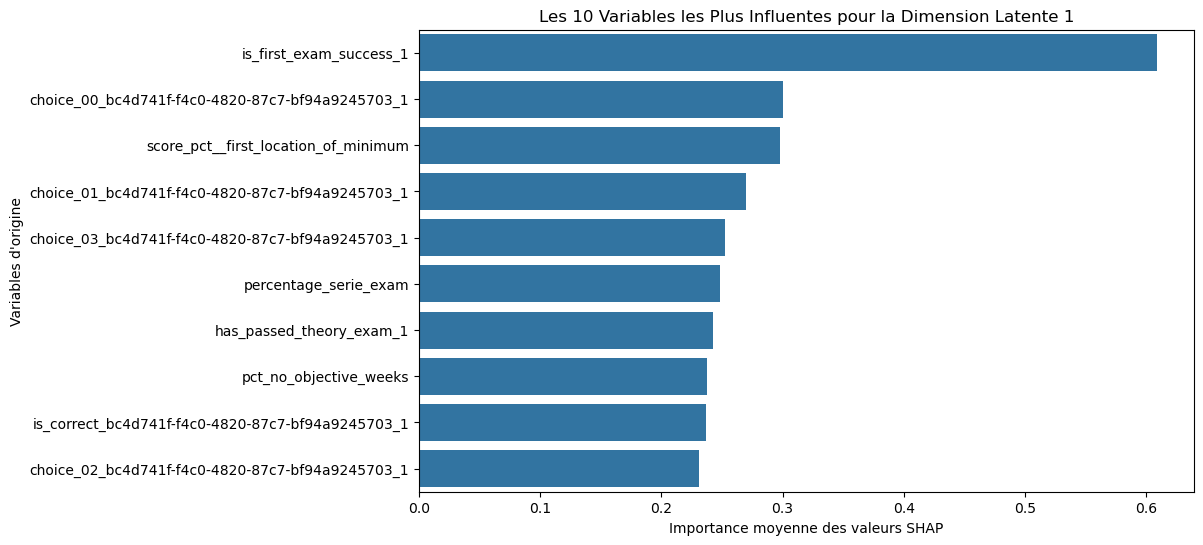

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pour chaque dimension latente
i=0 # dimensions latentes
shap_val = shap_values[:, :, i]  # Valeurs SHAP pour la i-√®me dimension latente (9000, 724)
    
# Cr√©er un DataFrame des valeurs SHAP pour les variables d'origine
shap_df = pd.DataFrame(shap_val, columns=final_columns)  # Colonnes correspondant aux variables d'origine
    
# Calcul de l'importance moyenne de chaque variable d'entr√©e pour cette dimension latente
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)  # Moyenne des valeurs absolues
    
# Affichage des 5 variables les plus influentes sous forme de barplot horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_shap_values.head(10).values, y=mean_shap_values.head(10).index, orient='h')  # Orient√© horizontalement
plt.title(f"Les 10 Variables les Plus Influentes pour la Dimension Latente {i+1}")
plt.xlabel("Importance moyenne des valeurs SHAP")
plt.ylabel("Variables d'origine")
plt.show()


Cette premi√®re dimension latente semble capturer une combinaison de facteurs li√©s √† la r√©ussite du permis de conduire, en particulier la r√©ussite aux examens th√©oriques et pratiques. La variable la plus influente, *is_first_exam_success_1*, indique que cette dimension est fortement associ√©e au fait de r√©ussir d√®s la premi√®re tentative. Les choix de r√©ponses aux questions du test (*choice_XX_...*) ainsi que les performances sp√©cifiques (*score_pct__first_location_of_minimum*) sugg√®rent que cette dimension encode un m√©lange de comp√©tences th√©oriques et de pr√©paration. Enfin, la pr√©sence de *percentage_serie_exam* et *pct_no_objective_weeks* montre que cette dimension pourrait aussi refl√©ter le niveau de pratique et d'entra√Ænement avant l'examen.

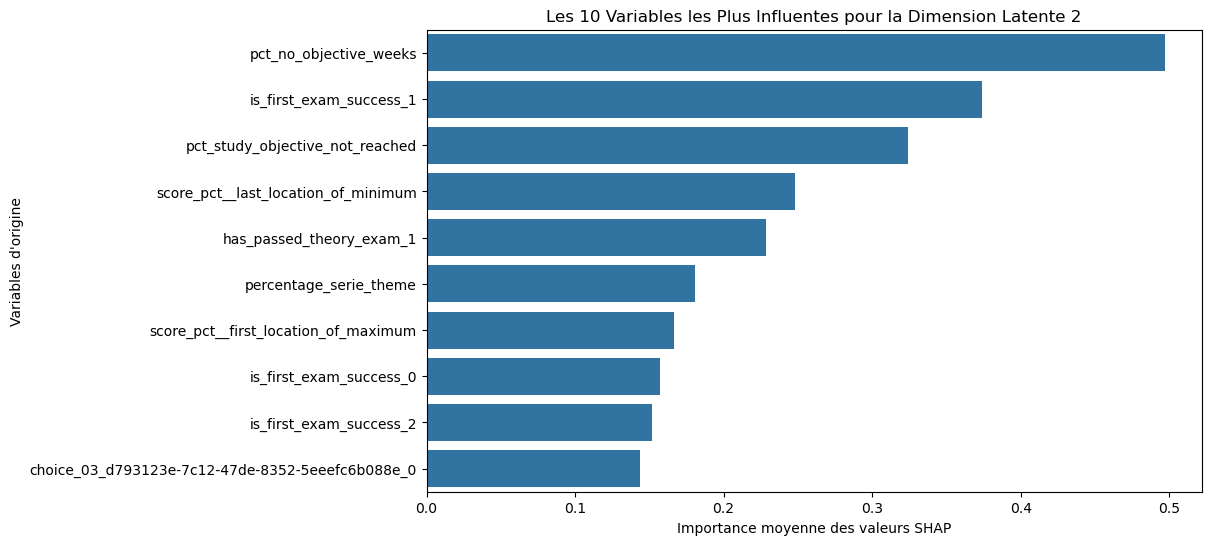

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pour chaque dimension latente
i=1 # dimensions latentes
shap_val = shap_values[:, :, i]  # Valeurs SHAP pour la i-√®me dimension latente (9000, 724)
    
# Cr√©er un DataFrame des valeurs SHAP pour les variables d'origine
shap_df = pd.DataFrame(shap_val, columns=final_columns)  # Colonnes correspondant aux variables d'origine
    
# Calcul de l'importance moyenne de chaque variable d'entr√©e pour cette dimension latente
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)  # Moyenne des valeurs absolues
    
# Affichage des 5 variables les plus influentes sous forme de barplot horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_shap_values.head(10).values, y=mean_shap_values.head(10).index, orient='h')  # Orient√© horizontalement
plt.title(f"Les 10 Variables les Plus Influentes pour la Dimension Latente {i+1}")
plt.xlabel("Importance moyenne des valeurs SHAP")
plt.ylabel("Variables d'origine")
plt.show()


Cette deuxi√®me dimension latente semble √™tre li√©e √† la r√©gularit√© et √† l‚Äôatteinte des objectifs d‚Äôapprentissage dans la pr√©paration au permis de conduire. La variable la plus influente, *pct_no_objective_weeks*, sugg√®re que cette dimension capte le degr√© de planification et de suivi des objectifs d‚Äô√©tude. La forte influence de *pct_study_objective_not_reached* renforce cette id√©e, indiquant que cette dimension pourrait diff√©rencier les candidats qui suivent rigoureusement leur pr√©paration de ceux qui sont plus irr√©guliers. La pr√©sence de *is_first_exam_success_* et *has_passed_theory_exam_* montre √©galement que la r√©ussite aux examens y joue un r√¥le, probablement en lien avec le niveau de pr√©paration. Enfin, les scores aux tests (*score_pct__last_location_of_minimum*, *score_pct__first_location_of_maximum*) pourraient refl√©ter des tendances dans la performance des candidats, sugg√©rant une dimension qui mesure la progression et l‚Äôefficacit√© de l‚Äôapprentissage.

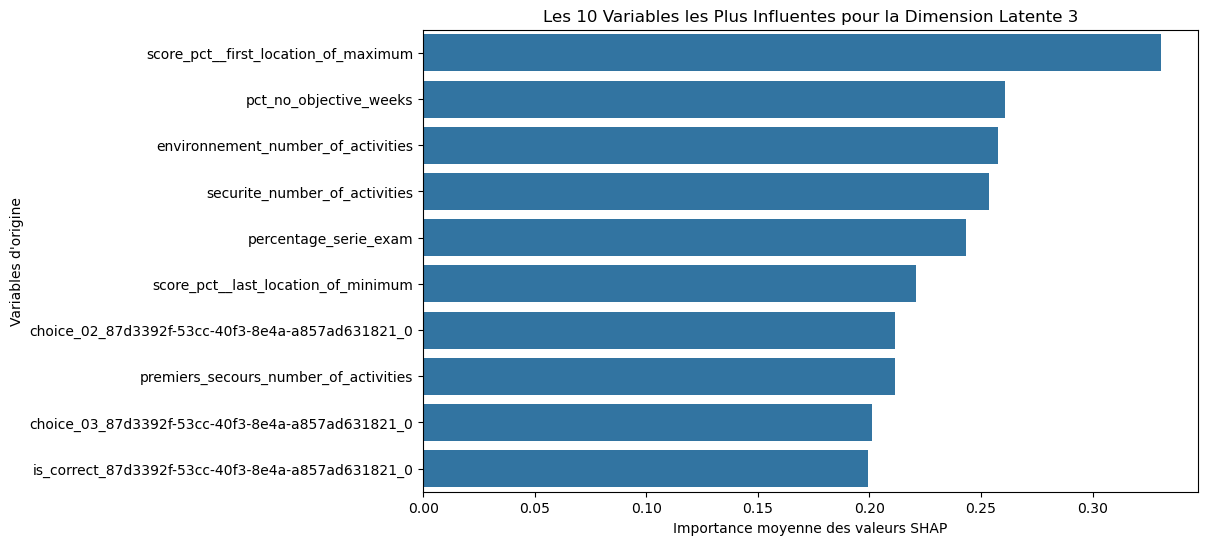

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pour chaque dimension latente
i=2 # dimensions latentes
shap_val = shap_values[:, :, i]  # Valeurs SHAP pour la i-√®me dimension latente (9000, 724)
    
# Cr√©er un DataFrame des valeurs SHAP pour les variables d'origine
shap_df = pd.DataFrame(shap_val, columns=final_columns)  # Colonnes correspondant aux variables d'origine
    
# Calcul de l'importance moyenne de chaque variable d'entr√©e pour cette dimension latente
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)  # Moyenne des valeurs absolues
    
# Affichage des 5 variables les plus influentes sous forme de barplot horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_shap_values.head(10).values, y=mean_shap_values.head(10).index, orient='h')  # Orient√© horizontalement
plt.title(f"Les 10 Variables les Plus Influentes pour la Dimension Latente {i+1}")
plt.xlabel("Importance moyenne des valeurs SHAP")
plt.ylabel("Variables d'origine")
plt.show()


Cette troisi√®me dimension latente semble capturer l‚Äôengagement des candidats dans des activit√©s li√©es √† la formation au permis de conduire, ainsi que leur progression dans les tests. La forte influence de *score_pct__first_location_of_maximum* et *score_pct__last_location_of_minimum* sugg√®re qu‚Äôelle refl√®te des aspects de la performance aux examens, notamment les moments o√π les scores maximaux et minimaux sont atteints. La pr√©sence de *pct_no_objective_weeks* indique √©galement un lien avec la r√©gularit√© de l‚Äôentra√Ænement.  

Les variables *environnement_number_of_activities*, *securite_number_of_activities* et *premiers_secours_number_of_activities* montrent que cette dimension est aussi influenc√©e par le nombre d‚Äôactivit√©s suivies dans diff√©rents domaines de la formation. Cela pourrait indiquer que cette dimension latente mesure l'implication globale dans la pr√©paration, en incluant √† la fois la th√©orie et des aspects pratiques comme la s√©curit√© et les premiers secours. Enfin, les variables li√©es aux choix de r√©ponses (*choice_XX_...* et *is_correct_...*) pourraient refl√©ter la mani√®re dont les candidats r√©pondent √† certains types de questions, sugg√©rant une corr√©lation avec des strat√©gies d‚Äôapprentissage sp√©cifiques.

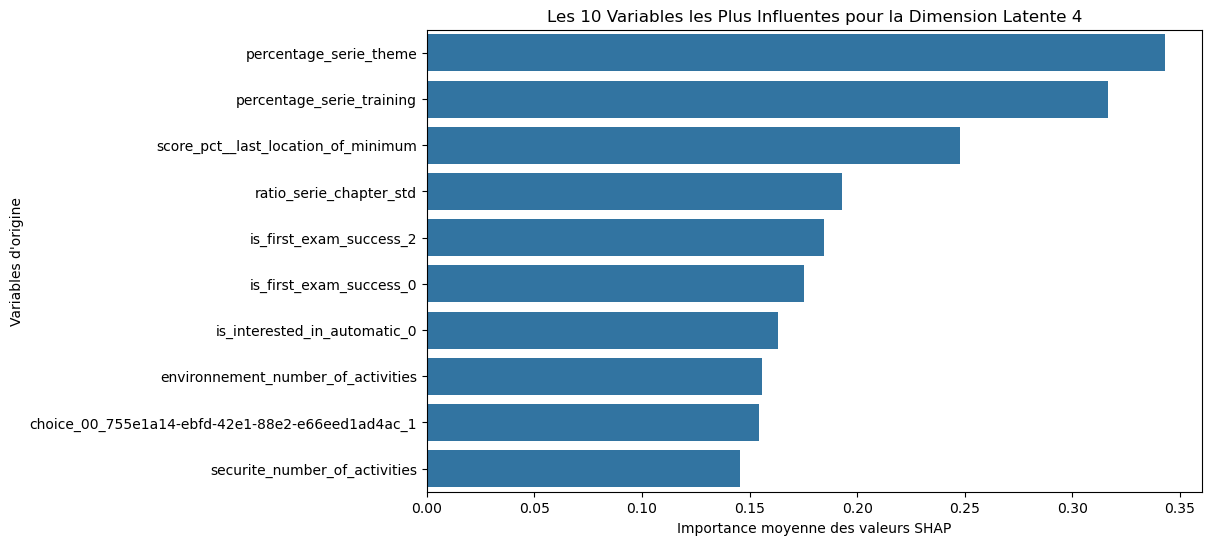

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pour chaque dimension latente
i=3 # dimensions latentes
shap_val = shap_values[:, :, i]  # Valeurs SHAP pour la i-√®me dimension latente (9000, 724)
    
# Cr√©er un DataFrame des valeurs SHAP pour les variables d'origine
shap_df = pd.DataFrame(shap_val, columns=final_columns)  # Colonnes correspondant aux variables d'origine
    
# Calcul de l'importance moyenne de chaque variable d'entr√©e pour cette dimension latente
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)  # Moyenne des valeurs absolues
    
# Affichage des 5 variables les plus influentes sous forme de barplot horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_shap_values.head(10).values, y=mean_shap_values.head(10).index, orient='h')  # Orient√© horizontalement
plt.title(f"Les 10 Variables les Plus Influentes pour la Dimension Latente {i+1}")
plt.xlabel("Importance moyenne des valeurs SHAP")
plt.ylabel("Variables d'origine")
plt.show()


Cette quatri√®me dimension latente semble refl√©ter la mani√®re dont les candidats structurent leur pr√©paration au permis de conduire, notamment en termes de diversit√© des entra√Ænements et de choix des th√©matiques √©tudi√©es. La forte influence de *percentage_serie_theme* et *percentage_serie_training* sugg√®re qu‚Äôelle est li√©e √† l‚Äô√©quilibre entre les diff√©rents types d‚Äôexercices et leur r√©partition dans le temps. La variabilit√© dans la r√©partition des chapitres (*ratio_serie_chapter_std*) renforce cette id√©e, indiquant que cette dimension pourrait diff√©rencier les candidats ayant une approche m√©thodique de ceux ayant une pr√©paration plus d√©sorganis√©e.  

L‚Äôinfluence des variables *is_first_exam_success_0* et *is_first_exam_success_2* laisse penser que cette dimension distingue ceux qui ont √©chou√© au test de ceux qui ne l‚Äôont pas encore pass√© ou n‚Äôont pas renseign√© leur statut. Cela pourrait refl√©ter une opposition entre candidats exp√©riment√©s, mais ayant rencontr√© des difficult√©s, et ceux encore en phase de pr√©paration. La variable *is_interested_in_automatic_0* pourrait √©galement jouer un r√¥le, sugg√©rant que les pr√©f√©rences en mati√®re de transmission influencent le type d‚Äôentra√Ænement suivi. Enfin, la pr√©sence des activit√©s sp√©cifiques (*environnement_number_of_activities*, *securite_number_of_activities*) montre que cette dimension int√®gre aussi l‚Äôimplication dans des aspects pratiques de la formation.

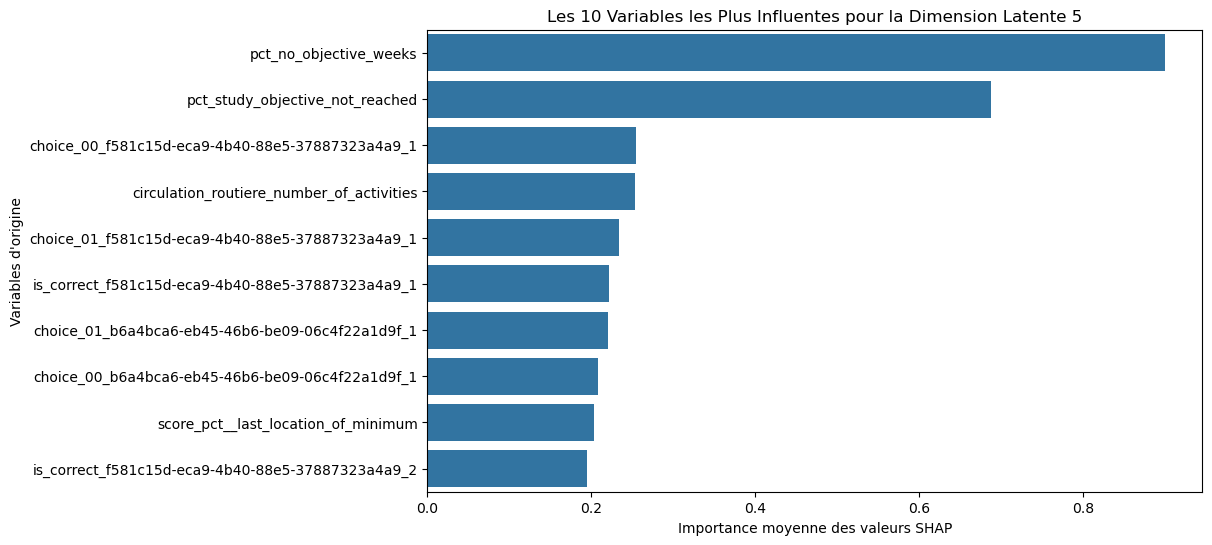

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pour chaque dimension latente
i=4 # dimensions latentes
shap_val = shap_values[:, :, i]  # Valeurs SHAP pour la i-√®me dimension latente (9000, 724)
    
# Cr√©er un DataFrame des valeurs SHAP pour les variables d'origine
shap_df = pd.DataFrame(shap_val, columns=final_columns)  # Colonnes correspondant aux variables d'origine
    
# Calcul de l'importance moyenne de chaque variable d'entr√©e pour cette dimension latente
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)  # Moyenne des valeurs absolues
    
# Affichage des 5 variables les plus influentes sous forme de barplot horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_shap_values.head(10).values, y=mean_shap_values.head(10).index, orient='h')  # Orient√© horizontalement
plt.title(f"Les 10 Variables les Plus Influentes pour la Dimension Latente {i+1}")
plt.xlabel("Importance moyenne des valeurs SHAP")
plt.ylabel("Variables d'origine")
plt.show()


Cette cinqui√®me dimension latente semble √™tre fortement li√©e √† la r√©gularit√© et √† la gestion des objectifs d'√©tude dans la pr√©paration au permis de conduire. Les variables *pct_no_objective_weeks* et *pct_study_objective_not_reached* montrent que cette dimension capte bien la discipline et le suivi des objectifs d'apprentissage, particuli√®rement chez ceux qui n'ont pas atteint leurs objectifs d'√©tude. Cela pourrait sugg√©rer que cette dimension repr√©sente une forme de frustration ou de manque de progression dans la pr√©paration.  

Les choix de r√©ponses (*choice_00_...*, *choice_01_...*) et les r√©ponses correctes (*is_correct_...*) montrent que cette dimension prend aussi en compte la mani√®re dont les candidats interagissent avec les questions du test, indiquant une relation entre les difficult√©s dans les tests et l'atteinte des objectifs. La variable *circulation_routiere_number_of_activities* sugg√®re √©galement que cette dimension pourrait √™tre li√©e √† la pratique en circulation, impliquant un lien avec les aspects pratiques du permis. Enfin, *score_pct__last_location_of_minimum* pourrait indiquer que cette dimension distingue les candidats qui rencontrent des difficult√©s dans certaines sections du test, mais continuent de pers√©v√©rer.

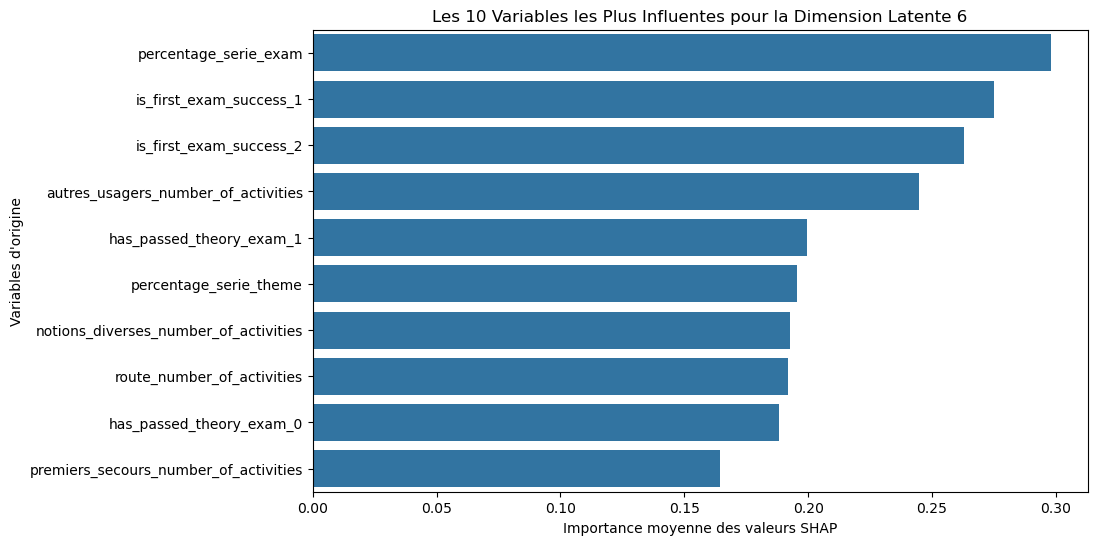

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pour chaque dimension latente
i=5 # dimensions latentes
shap_val = shap_values[:, :, i]  # Valeurs SHAP pour la i-√®me dimension latente (9000, 724)
    
# Cr√©er un DataFrame des valeurs SHAP pour les variables d'origine
shap_df = pd.DataFrame(shap_val, columns=final_columns)  # Colonnes correspondant aux variables d'origine
    
# Calcul de l'importance moyenne de chaque variable d'entr√©e pour cette dimension latente
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)  # Moyenne des valeurs absolues
    
# Affichage des 5 variables les plus influentes sous forme de barplot horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_shap_values.head(10).values, y=mean_shap_values.head(10).index, orient='h')  # Orient√© horizontalement
plt.title(f"Les 10 Variables les Plus Influentes pour la Dimension Latente {i+1}")
plt.xlabel("Importance moyenne des valeurs SHAP")
plt.ylabel("Variables d'origine")
plt.show()


Cette sixi√®me dimension latente semble capturer des aspects li√©s √† la progression g√©n√©rale des candidats dans leur pr√©paration au permis de conduire, notamment leur r√©ussite aux examens et leur participation √† diverses activit√©s pratiques. La variable *percentage_serie_exam* indique que cette dimension est en partie influenc√©e par la quantit√© de s√©ries d‚Äôexamens suivies, ce qui sugg√®re une relation avec l‚Äôengagement dans les tests.  

Les variables *is_first_exam_success_1* et *is_first_exam_success_2* montrent que la r√©ussite au premier examen, ou l‚Äôabsence de renseignement sur celui-ci, joue un r√¥le important dans cette dimension, avec une distinction claire entre ceux qui r√©ussissent d√®s la premi√®re tentative et ceux qui ne l‚Äôont pas encore pass√©. L‚Äôinfluence de *has_passed_theory_exam_1* et *has_passed_theory_exam_0* montre √©galement une corr√©lation avec la r√©ussite ou l‚Äô√©chec aux examens th√©oriques. 

Les activit√©s pratiques, telles que *autres_usagers_number_of_activities*, *route_number_of_activities*, et *premiers_secours_number_of_activities*, r√©v√®lent que cette dimension int√®gre √©galement la diversit√© des exp√©riences pratiques suivies, notamment celles li√©es √† la circulation et √† la s√©curit√© routi√®re. Cela sugg√®re que la dimension latente pourrait refl√©ter un candidat ayant une pr√©paration plus √©quilibr√©e, combinant th√©orie et pratique, et ayant un taux de r√©ussite plus √©lev√© en cons√©quence.

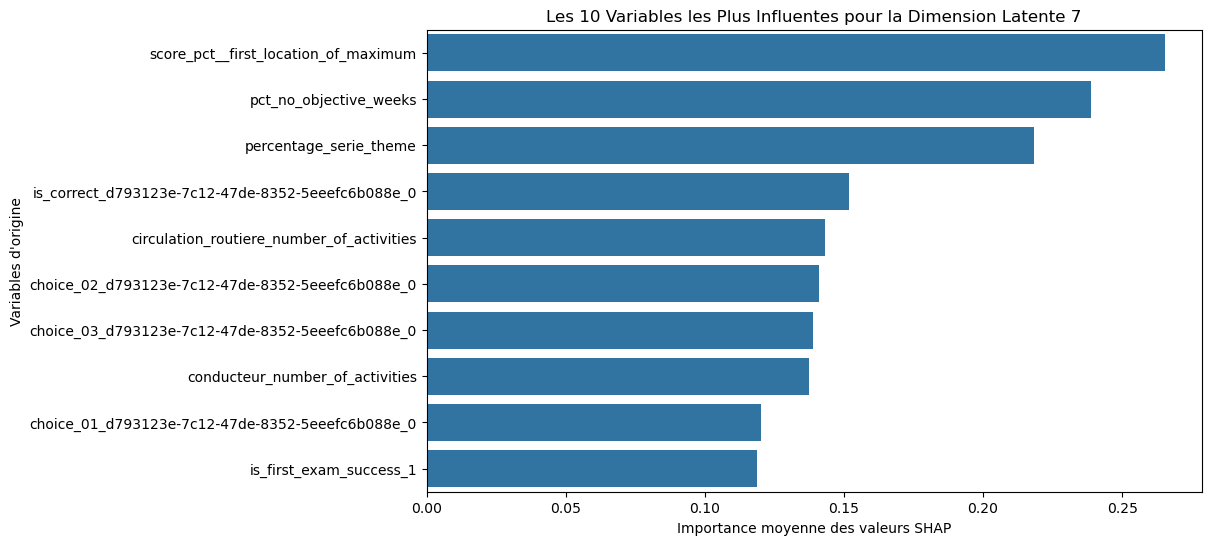

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pour chaque dimension latente
i=6 # dimensions latentes
shap_val = shap_values[:, :, i]  # Valeurs SHAP pour la i-√®me dimension latente (9000, 724)
    
# Cr√©er un DataFrame des valeurs SHAP pour les variables d'origine
shap_df = pd.DataFrame(shap_val, columns=final_columns)  # Colonnes correspondant aux variables d'origine
    
# Calcul de l'importance moyenne de chaque variable d'entr√©e pour cette dimension latente
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)  # Moyenne des valeurs absolues
    
# Affichage des 5 variables les plus influentes sous forme de barplot horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_shap_values.head(10).values, y=mean_shap_values.head(10).index, orient='h')  # Orient√© horizontalement
plt.title(f"Les 10 Variables les Plus Influentes pour la Dimension Latente {i+1}")
plt.xlabel("Importance moyenne des valeurs SHAP")
plt.ylabel("Variables d'origine")
plt.show()


Cette septi√®me dimension latente semble √™tre centr√©e sur la performance et l'engagement dans la pr√©paration, en particulier en relation avec les tests pratiques et th√©oriques. La variable *score_pct__first_location_of_maximum* sugg√®re que cette dimension capte des √©l√©ments de la performance des candidats, notamment les moments o√π ils obtiennent leurs meilleurs scores dans le test. Cela peut indiquer une dimension o√π la ma√Ætrise de certaines comp√©tences, comme les tests de connaissances sp√©cifiques, joue un r√¥le cl√©.

Les variables *pct_no_objective_weeks* et *percentage_serie_theme* montrent un lien avec l'organisation et la structure de la pr√©paration, sugg√©rant que les candidats ayant un plan d'√©tude plus rigoureux pourraient se retrouver dans cette dimension. La pr√©sence des variables li√©es aux activit√©s pratiques (*circulation_routiere_number_of_activities* et *conducteur_number_of_activities*) indique que l'engagement dans des pratiques concr√®tes est √©galement un facteur influent dans cette dimension, peut-√™tre en lien avec l'apprentissage de la conduite elle-m√™me.

Les choix de r√©ponses aux tests (*choice_XX_d793123e-7c12-47de-8352-5eeefc6b088e_0*) et la variable *is_correct_d793123e-7c12-47de-8352-5eeefc6b088e_0* montrent que cette dimension est √©galement li√©e √† la capacit√© des candidats √† r√©pondre correctement aux questions des examens. Enfin, *is_first_exam_success_1* indique que cette dimension refl√®te probablement un groupe de candidats qui ont r√©ussi le premier examen, sugg√©rant que la dimension latente capte ceux qui sont plus susceptibles de r√©ussir d√®s la premi√®re tentative.

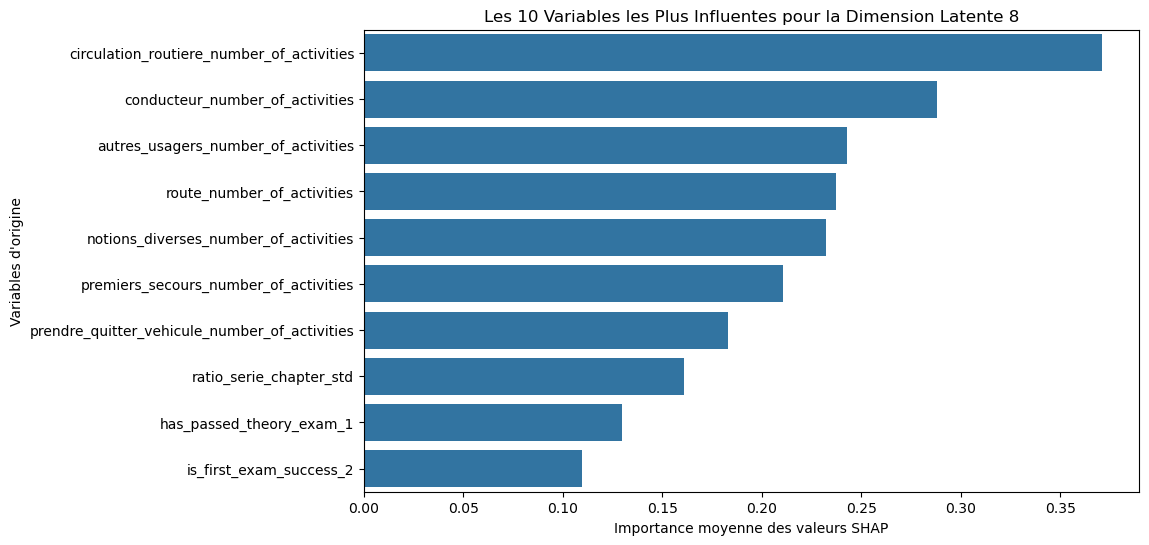

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pour chaque dimension latente
i=7 # dimensions latentes
shap_val = shap_values[:, :, i]  # Valeurs SHAP pour la i-√®me dimension latente (9000, 724)
    
# Cr√©er un DataFrame des valeurs SHAP pour les variables d'origine
shap_df = pd.DataFrame(shap_val, columns=final_columns)  # Colonnes correspondant aux variables d'origine
    
# Calcul de l'importance moyenne de chaque variable d'entr√©e pour cette dimension latente
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)  # Moyenne des valeurs absolues
    
# Affichage des 5 variables les plus influentes sous forme de barplot horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_shap_values.head(10).values, y=mean_shap_values.head(10).index, orient='h')  # Orient√© horizontalement
plt.title(f"Les 10 Variables les Plus Influentes pour la Dimension Latente {i+1}")
plt.xlabel("Importance moyenne des valeurs SHAP")
plt.ylabel("Variables d'origine")
plt.show()


Cette huiti√®me dimension latente semble fortement ax√©e sur l‚Äôimplication pratique des candidats dans la pr√©paration au permis de conduire. Les variables *circulation_routiere_number_of_activities*, *conducteur_number_of_activities*, et *route_number_of_activities* indiquent que la pratique de la conduite, l‚Äôapprentissage de la circulation routi√®re, et l‚Äôimplication dans des activit√©s li√©es √† la route sont des √©l√©ments cl√©s dans cette dimension. Cela sugg√®re que cette dimension repr√©sente les candidats qui s‚Äôengagent activement dans des exp√©riences de conduite et des formations pratiques.

L‚Äôinfluence de *notions_diverses_number_of_activities* et *premiers_secours_number_of_activities* indique aussi que des connaissances plus larges et des formations en s√©curit√©, telles que les premiers secours, jouent un r√¥le dans cette dimension, sugg√©rant une pr√©paration plus compl√®te. *prendre_quitter_vehicule_number_of_activities* pourrait √™tre li√© aux pratiques concernant la gestion du v√©hicule, telles que l'entr√©e et la sortie du v√©hicule dans des contextes sp√©cifiques. 

Le *ratio_serie_chapter_std* montre que cette dimension inclut aussi des candidats ayant un parcours d‚Äô√©tude plus vari√©, avec des diff√©rences dans la r√©partition des chapitres d'√©tude. Les variables *has_passed_theory_exam_1* et *is_first_exam_success_2* ajoutent des √©l√©ments de performance th√©orique et de statut de r√©ussite, indiquant que cette dimension peut aussi inclure des candidats ayant pass√© leur examen th√©orique, mais avec un √©ventuel retard ou un √©chec √† la premi√®re tentative. En somme, cette dimension semble capturer l‚Äôengagement pratique et la diversit√© des exp√©riences dans la pr√©paration au permis.

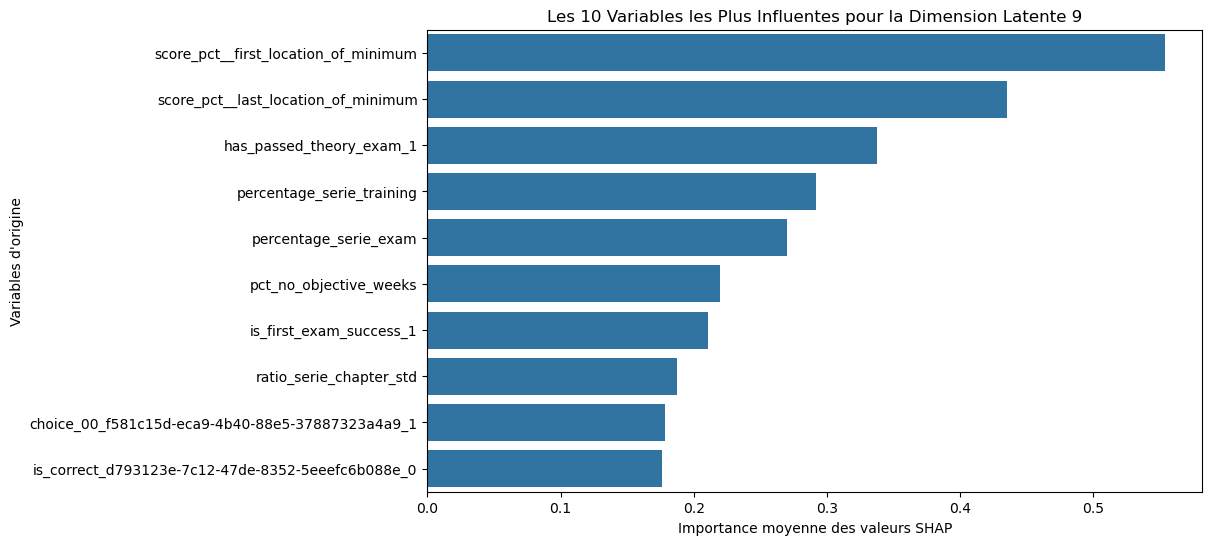

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pour chaque dimension latente
i=8 # dimensions latentes
shap_val = shap_values[:, :, i]  # Valeurs SHAP pour la i-√®me dimension latente (9000, 724)
    
# Cr√©er un DataFrame des valeurs SHAP pour les variables d'origine
shap_df = pd.DataFrame(shap_val, columns=final_columns)  # Colonnes correspondant aux variables d'origine
    
# Calcul de l'importance moyenne de chaque variable d'entr√©e pour cette dimension latente
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)  # Moyenne des valeurs absolues
    
# Affichage des 5 variables les plus influentes sous forme de barplot horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_shap_values.head(10).values, y=mean_shap_values.head(10).index, orient='h')  # Orient√© horizontalement
plt.title(f"Les 10 Variables les Plus Influentes pour la Dimension Latente {i+1}")
plt.xlabel("Importance moyenne des valeurs SHAP")
plt.ylabel("Variables d'origine")
plt.show()


Cette neuvi√®me dimension latente semble √™tre centr√©e sur les aspects li√©s aux r√©sultats des tests, √† la performance dans les s√©ries d'examens et √† la pr√©paration th√©orique. Les variables *score_pct__first_location_of_minimum* et *score_pct__last_location_of_minimum* sugg√®rent que cette dimension capte des aspects de la performance des candidats en termes de scores les plus bas dans les tests, ce qui pourrait indiquer des difficult√©s dans certaines parties de l'examen ou une tendance √† l'√©chec dans certaines sections sp√©cifiques.

Les variables *has_passed_theory_exam_1* et *is_first_exam_success_1* confirment que cette dimension est li√©e √† ceux qui ont r√©ussi l'examen th√©orique, avec une distinction pour ceux qui ont r√©ussi d√®s la premi√®re tentative. L'influence de *percentage_serie_training* et *percentage_serie_exam* indique que l'engagement dans la pr√©paration (en termes de formation et de s√©ries d'examens) a un impact important sur cette dimension, sugg√©rant que les candidats ayant suivi une pr√©paration plus approfondie sont mieux repr√©sent√©s dans cette dimension.

*PCT_no_objective_weeks* indique que l'absence d'objectifs pr√©cis dans la pr√©paration pourrait aussi avoir un impact, bien que moins fort. La variable *ratio_serie_chapter_std* montre que cette dimension refl√®te aussi la variabilit√© dans la mani√®re dont les candidats r√©partissent leur temps et leurs efforts d'√©tude, avec des candidats ayant des parcours d'√©tude plus standardis√©s. Enfin, les variables *choice_00_f581c15d-eca9-4b40-88e5-37887323a4a9_1* et *is_correct_d793123e-7c12-47de-8352-5eeefc6b088e_0* montrent que cette dimension capture √©galement l'influence des choix de r√©ponses lors des tests et des bonnes r√©ponses fournies, ce qui renforce l'id√©e que cette dimension est li√©e √† la performance test√©e et √† la pr√©paration th√©orique.

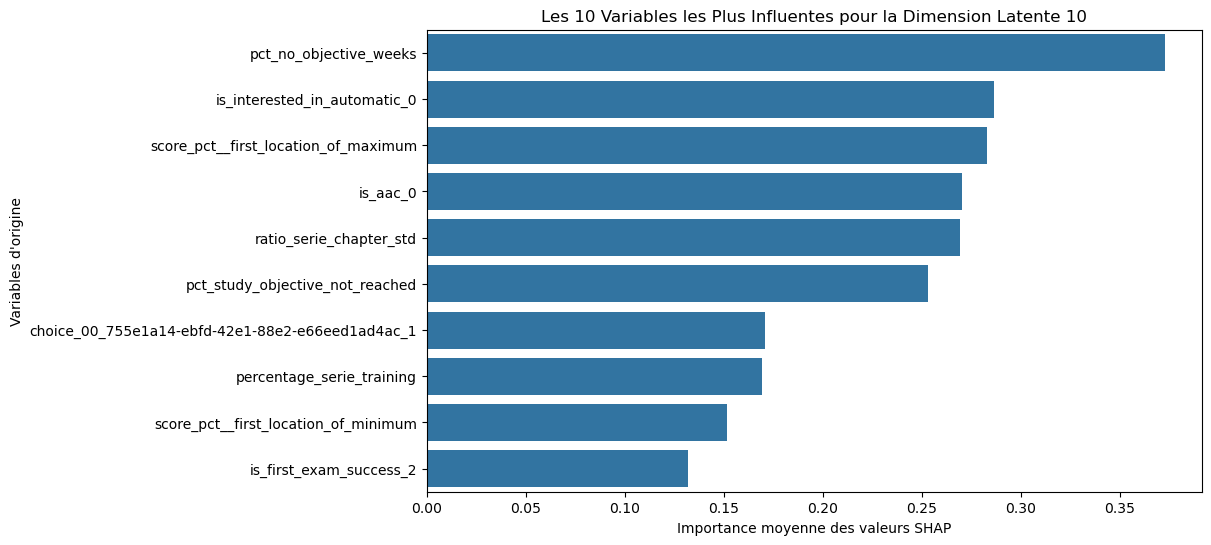

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pour chaque dimension latente
i=9 # dimensions latentes
shap_val = shap_values[:, :, i]  # Valeurs SHAP pour la i-√®me dimension latente (9000, 724)
    
# Cr√©er un DataFrame des valeurs SHAP pour les variables d'origine
shap_df = pd.DataFrame(shap_val, columns=final_columns)  # Colonnes correspondant aux variables d'origine
    
# Calcul de l'importance moyenne de chaque variable d'entr√©e pour cette dimension latente
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)  # Moyenne des valeurs absolues
    
# Affichage des 5 variables les plus influentes sous forme de barplot horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_shap_values.head(10).values, y=mean_shap_values.head(10).index, orient='h')  # Orient√© horizontalement
plt.title(f"Les 10 Variables les Plus Influentes pour la Dimension Latente {i+1}")
plt.xlabel("Importance moyenne des valeurs SHAP")
plt.ylabel("Variables d'origine")
plt.show()


La dixi√®me dimension latente semble refl√©ter une combinaison de facteurs li√©s √† la motivation personnelle, √† la pr√©paration √† l'examen, et aux difficult√©s rencontr√©es dans le parcours d‚Äôapprentissage. 

*PCT_no_objective_weeks* indique que cette dimension est fortement influenc√©e par les semaines pass√©es sans objectifs clairs, sugg√©rant que l'absence d'objectifs pr√©cis dans la pr√©paration peut caract√©riser cette dimension. 

L'influence de *is_interested_in_automatic_0* et *is_aac_0* indique un lien avec les pr√©f√©rences personnelles et le statut par rapport √† certaines formations ou tests, telles que la pr√©f√©rence pour un permis automatique ou un statut d'examen sp√©cifique. Cela pourrait refl√©ter un groupe de candidats ayant des choix ou des difficult√©s particuliers en mati√®re de type de permis ou de pr√©paration.

Les variables *score_pct__first_location_of_maximum* et *score_pct__first_location_of_minimum* montrent une attention particuli√®re aux extr√™mes de performance (les scores les plus √©lev√©s et les plus bas), sugg√©rant que cette dimension est influenc√©e par une vari√©t√© de performances, incluant des pics de r√©ussite ou des moments de difficult√©. 

La variable *ratio_serie_chapter_std* met en √©vidence la diversit√© des parcours d‚Äô√©tudes, en particulier dans les chapitres de formation, et pourrait signifier que cette dimension repr√©sente des candidats ayant une approche d'√©tude moins homog√®ne. En outre, *pct_study_objective_not_reached* refl√®te l'impact des objectifs d'√©tude non atteints, ce qui souligne une difficult√© dans l'atteinte des objectifs fix√©s. Enfin, la faible influence de *is_first_exam_success_2* confirme que cette dimension peut inclure des candidats qui n'ont pas encore pass√© ou r√©ussi le test.

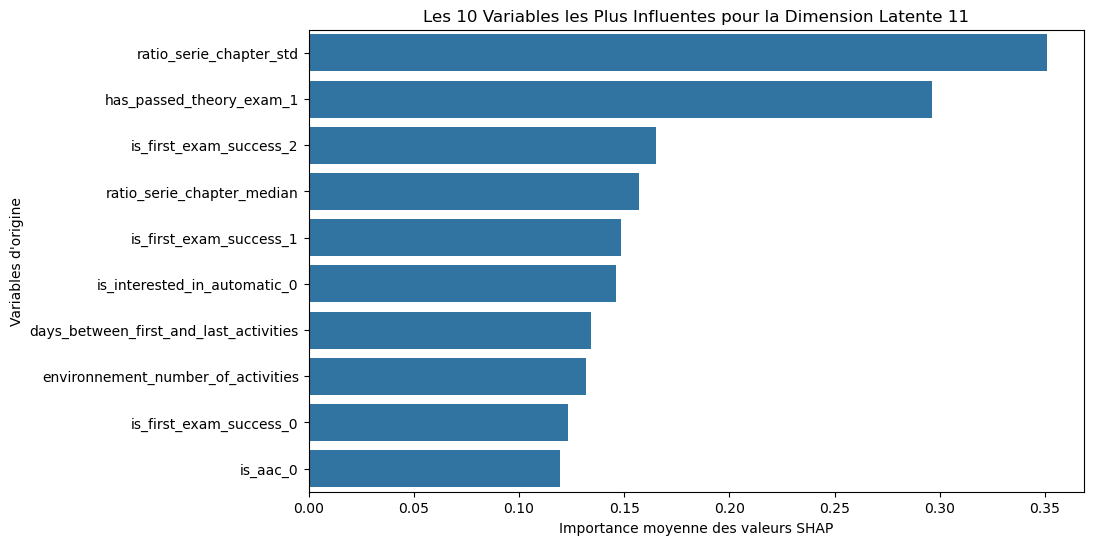

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pour chaque dimension latente
i=10 # dimensions latentes
shap_val = shap_values[:, :, i]  # Valeurs SHAP pour la i-√®me dimension latente (9000, 724)
    
# Cr√©er un DataFrame des valeurs SHAP pour les variables d'origine
shap_df = pd.DataFrame(shap_val, columns=final_columns)  # Colonnes correspondant aux variables d'origine
    
# Calcul de l'importance moyenne de chaque variable d'entr√©e pour cette dimension latente
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)  # Moyenne des valeurs absolues
    
# Affichage des 5 variables les plus influentes sous forme de barplot horizontal
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_shap_values.head(10).values, y=mean_shap_values.head(10).index, orient='h')  # Orient√© horizontalement
plt.title(f"Les 10 Variables les Plus Influentes pour la Dimension Latente {i+1}")
plt.xlabel("Importance moyenne des valeurs SHAP")
plt.ylabel("Variables d'origine")
plt.show()


La onzi√®me dimension latente semble √™tre centr√©e sur les habitudes d'√©tude, le passage du test th√©orique et les r√©sultats associ√©s, tout en mettant en √©vidence l'impact de la pr√©paration et des choix personnels.

La variable *ratio_serie_chapter_std* sugg√®re que cette dimension est fortement influenc√©e par la variabilit√© dans la mani√®re dont les candidats r√©partissent leur temps et leurs efforts d‚Äô√©tude entre les diff√©rents chapitres de la s√©rie. Cela pourrait indiquer que les candidats de cette dimension ont des profils d‚Äô√©tude diversifi√©s, avec des variations dans leur approche d‚Äôapprentissage.

*has_passed_theory_exam_1* montre que cette dimension inclut une proportion importante de candidats ayant r√©ussi l'examen th√©orique, et la variable *is_first_exam_success_1* confirme qu'une partie des individus ont r√©ussi l'examen d√®s leur premi√®re tentative. Cependant, *is_first_exam_success_2* indique aussi la pr√©sence de ceux qui n'ont pas encore pass√© ou qui n‚Äôont pas renseign√© les r√©sultats du test, ce qui montre une certaine h√©t√©rog√©n√©it√© dans les candidats repr√©sent√©s par cette dimension.

La variable *ratio_serie_chapter_median* sugg√®re √©galement une influence de la r√©partition m√©diane du temps d‚Äô√©tude, ce qui peut signaler que les candidats de cette dimension ont un parcours d‚Äô√©tude relativement √©quilibr√©.

*is_interested_in_automatic_0* et *is_aac_0* montrent que cette dimension peut √©galement inclure des pr√©f√©rences sp√©cifiques en mati√®re de type de permis ou de statut d‚Äôexamen. De plus, *days_between_first_and_last_activities* met en √©vidence une dimension temporelle dans le processus d'√©tude, repr√©sentant des candidats qui peuvent avoir des p√©riodes plus longues entre leurs premi√®res et derni√®res activit√©s, indiquant peut-√™tre une approche plus √©tendue ou d√©sorganis√©e.

Enfin, *environnement_number_of_activities* et *is_first_exam_success_0* montrent une influence de l'environnement d‚Äô√©tude et de ceux qui n‚Äôont pas r√©ussi √† passer leur premier examen.

<br/>
<p style="font-family: 'Georgia', serif; text-align: center;font-size: 25px">
<u>
3- Comparaison des r√©sultats obtenu par les 3 m√©thodes </u>
</p>
<br/>

Il peut √™tre d√©licat de comparer les performances d'une ACP, d'une FAMD et d'un autoencodeur dans la mesure ou ces trois approches, bien que des m√©thodes de r√©duction de dimensions, utilisent des approches diff√©rentes. L'ACP est une m√©thode lin√©aire tandisque les autoencodeurs sont des r√©seaux de neurones qui peuvent mod√©liser des relations non lin√©aires.

Pour effectuer cette t√¢che, nous allons principalement utiliser l'erreur de reconstruction et l'information mutuelle. Ceci va nous permettre d'une part de voir qu'elle m√©thode reconstruit la base avec le moins d'erreur et d'autre part de quantifier √† quel point les donn√©es reconstruites retiennent les m√™mes informations que les donn√©es originales.


In [32]:
#A priori avec le code suivant, cela marche : 
import pandas as pd
import pyarrow.parquet as pq

# Chemin du fichier
chemin_fichier = "C:/Users/lisaw/Desktop/ENSAE/2AD/Projet-stat-ap/Donnees/base_assu.parquet"

# Lire les m√©tadonn√©es du fichier (sans charger les donn√©es)
parquet_file = pq.ParquetFile(chemin_fichier)

# Obtenir la liste des colonnes SANS charger le fichier
all_columns = parquet_file.schema.names

print(all_columns)
 
# Exclure la colonne probl√©matique
columns_to_read = [col for col in all_columns if col != "first_theory_activity_date" and col != "var_Assurance19"]
 
# Lire uniquement les colonnes s√©lectionn√©es
df = pd.read_parquet(chemin_fichier, columns=columns_to_read, engine="fastparquet")

print("Fichier import√© avec succ√®s 9")

display(df)

['unique_learner_id', 'days_between_signup_and_first_activity', 'days_between_order_and_first_activity', 'first_theory_activity_date', 'days_between_first_and_last_activities', 'chapter_before_success_count', 'serie_before_success_count', 'quiz_before_success_count', 'theory_activities_total', 'weekly_study_objective', 'is_first_exam_success', 'days_between_booking_and_exam', 'nb_mistakes_first_exam', 'score_at_registration', 'score_before_exam', 'days_between_first_activity_and_exam', 'days_between_order_and_exam', 'avg_self_assessment', 'avg_self_assessment_gap', 'percentage_activities_2_3_4h_week', 'percentage_activities_5_6_7h_week', 'percentage_activities_23_0_1h_week', 'percentage_activities_2_3_4h_weekend', 'percentage_activities_5_6_7h_weekend', 'percentage_activities_23_0_1h_weekend', 'percentage_activities_8h_week', 'percentage_activities_8h_weekend', 'percentage_activities_9h_week', 'percentage_activities_9h_weekend', 'percentage_activities_10h_week', 'percentage_activities_

unique_learner_id  days_between_signup_and_first_activity  \
0      -9209947526891003402                                     254   
1       5932580794384582589                                       8   
2       4336757673841606054                                     287   
3       1964860462838851923                                       0   
4      -1955538004573216258                                     175   
...                     ...                                     ...   
40152  -6381987474553350311                                     325   
40153  -5410493136313413497                                    1053   
40154   3384927917007667788                                       0   
40155    371936028404622808                                       0   
40156  -5675536495244026721                                     694   

       days_between_order_and_first_activity  \
0                                        254   
1                                          7   
2                                         48   
3                                       -229   
4                                        176   
...                                      ...   
40152                                    326   
40153                                   1054   
40154                                      0   
40155                                    -15   
40156                                    695   

       days_between_first_and_last_activities  chapter_before_success_count  \
0                                         102                             0   
1                                         910                             0   
2                                         342                             0   
3                                         313                             0   
4                                         636                             0   
...                                       ...                           ...   
40152                                     827                             0   
40153                                      56                             0   
40154                                     139                             0   
40155                                     271                             0   
40156                                     230                             0   

       serie_before_success_count  quiz_before_success_count  \
0                               0                          0   
1                               0                          0   
2                              92                          0   
3                             228                          0   
4                              88                          0   
...                           ...                        ...   
40152                           0                          0   
40153                          58                         34   
40154                           0                          0   
40155                          38                         53   
40156                           0                          0   

       theory_activities_total  weekly_study_objective  is_first_exam_success  \
0                           57                     120                  False   
1                           84                      90                   <NA>   
2                          247                     240                   True   
3                          228                     240                   True   
4                           93                     240                   True   
...                        ...                     ...                    ...   
40152                       52                      90                   <NA>   
40153                       92                     240                   True   
40154                       62                     240                   <NA>   
40155                       91                     1

   ---------------------------------------- 0.0/673.3 kB ? eta -:--:--
   -- ------------------------------------- 41.0/673.3 kB 1.9 MB/s eta 0:00:01
   -------------------- ------------------- 337.9/673.3 kB 5.3 MB/s eta 0:00:01
   ------------------------------------ --- 614.4/673.3 kB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 673.3/673.3 kB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.1 MB 8.9 MB/s eta 0:00:01
   ---------- ----------------------------- 0.6/2.1 MB 7.1 MB/s eta 0:00:01
   -------------- ------------------------- 0.8/2.1 MB 6.1 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.1 MB 5.8 MB/s eta 0:00:01
   -------------------------- ------------- 1.4/2.1 MB 6.3 MB/s eta 0:00:01
   ------------------------------- -------- 1.6/2.1 MB 6.1 MB/s eta 0:00:01
   ---------------------------------- ----- 1.8/2.1 MB 5.7 MB/s eta 0:00:01
   ------